In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('swami_vivekananda_letters_complete.csv')

# Basic structure
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("Column Names and Data Types:")
print("="*80)
print(df.dtypes)

Dataset Shape: (762, 27)

Column Names and Data Types:
Index                     int64
volume                  float64
Name                     object
Category                 object
Type                     object
Date                     object
Place                    object
Source                  float64
Audience                 object
Language                 object
section                  object
genre                    object
href                     object
full_url                 object
filename                 object
has_html                   bool
has_date                   bool
has_place                  bool
has_audience               bool
html_content             object
html_length               int64
body_text                object
signature_text           object
ps_text                  object
body_word_count           int64
signature_word_count      int64
ps_word_count             int64
dtype: object


In [4]:
# Basic info and statistics - handling mixed types
print("BASIC STATISTICS:")
print("="*80)
print(f"Total Letters: {len(df)}")
print(f"\nDate column type issues - let's check unique values:")
print(f"Non-null dates: {df['Date'].notna().sum()}")
print(f"Null dates: {df['Date'].isna().sum()}")

print(f"\nMissing Values by Column:")
missing = df.isnull().sum()
print(missing[missing > 0])  # Only show columns with missing values

print(f"\nWord Count Statistics:")
print(df[['body_word_count', 'signature_word_count', 'ps_word_count']].describe())

print(f"\nExtraction Success Summary:")
print(f"Letters with body text: {(df['body_word_count'] > 0).sum()} ({(df['body_word_count'] > 0).sum()/len(df)*100:.1f}%)")
print(f"Letters with signatures: {(df['signature_word_count'] > 0).sum()} ({(df['signature_word_count'] > 0).sum()/len(df)*100:.1f}%)")
print(f"Letters with postscripts: {(df['ps_word_count'] > 0).sum()} ({(df['ps_word_count'] > 0).sum()/len(df)*100:.1f}%)")

BASIC STATISTICS:
Total Letters: 762

Date column type issues - let's check unique values:
Non-null dates: 759
Null dates: 3

Missing Values by Column:
Category            2
Type                1
Date                3
Place               7
Source            762
Audience            4
Language            3
signature_text     29
ps_text           706
dtype: int64

Word Count Statistics:
       body_word_count  signature_word_count  ps_word_count
count       762.000000            762.000000     762.000000
mean        332.551181              3.274278       2.585302
std         363.602143              1.973436      14.851298
min          16.000000              0.000000       0.000000
25%         115.000000              2.000000       0.000000
50%         222.000000              3.000000       0.000000
75%         410.750000              5.000000       0.000000
max        3147.000000             14.000000     263.000000

Extraction Success Summary:
Letters with body text: 762 (100.0%)
Letters

In [5]:
# Comprehensive overview: distributions and extremes
print("="*80)
print("CATEGORICAL DISTRIBUTIONS")
print("="*80)

print("\nLANGUAGE DISTRIBUTION:")
print(df['Language'].value_counts(dropna=False))

print("\n\nAUDIENCE DISTRIBUTION (All):")
print(df['Audience'].value_counts(dropna=False))

print("\n\nTYPE DISTRIBUTION:")
print(df['Type'].value_counts(dropna=False))

print("\n\nCATEGORY DISTRIBUTION:")
print(df['Category'].value_counts(dropna=False))

print("\n" + "="*80)
print("EXTREME CASES - BODY TEXT")
print("="*80)

# Longest body
longest_idx = df['body_word_count'].idxmax()
print(f"\nLONGEST LETTER (Body: {df.loc[longest_idx, 'body_word_count']} words):")
print(f"To: {df.loc[longest_idx, 'Audience']}")
print(f"Date: {df.loc[longest_idx, 'Date']}, Place: {df.loc[longest_idx, 'Place']}")
print(f"Preview: {df.loc[longest_idx, 'body_text'][:300]}...")

# Shortest body
shortest_idx = df['body_word_count'].idxmin()
print(f"\n\nSHORTEST LETTER (Body: {df.loc[shortest_idx, 'body_word_count']} words):")
print(f"To: {df.loc[shortest_idx, 'Audience']}")
print(f"Date: {df.loc[shortest_idx, 'Date']}, Place: {df.loc[shortest_idx, 'Place']}")
print(f"Full text: {df.loc[shortest_idx, 'body_text']}")

print("\n" + "="*80)
print("EXTREME CASES - SIGNATURES")
print("="*80)

# Longest signature
longest_sig_idx = df['signature_word_count'].idxmax()
print(f"\nLONGEST SIGNATURE ({df.loc[longest_sig_idx, 'signature_word_count']} words):")
print(f"To: {df.loc[longest_sig_idx, 'Audience']}")
print(f"Signature: {df.loc[longest_sig_idx, 'signature_text']}")

# Show a few other long signatures
print(f"\n\nOTHER LONG SIGNATURES (>8 words):")
long_sigs = df[df['signature_word_count'] > 8].sort_values('signature_word_count', ascending=False)
for idx, row in long_sigs.iterrows():
    print(f"\n{row['signature_word_count']} words to {row['Audience']}:")
    print(f"{row['signature_text']}")

print("\n" + "="*80)
print("EXTREME CASES - POSTSCRIPTS")
print("="*80)

# Longest postscript
longest_ps_idx = df['ps_word_count'].idxmax()
print(f"\nLONGEST POSTSCRIPT ({df.loc[longest_ps_idx, 'ps_word_count']} words):")
print(f"To: {df.loc[longest_ps_idx, 'Audience']}")
print(f"Date: {df.loc[longest_ps_idx, 'Date']}")
print(f"Postscript: {df.loc[longest_ps_idx, 'ps_text'][:500]}...")

# All postscripts with >50 words
print(f"\n\nALL POSTSCRIPTS >50 WORDS:")
long_ps = df[df['ps_word_count'] > 50].sort_values('ps_word_count', ascending=False)
for idx, row in long_ps.iterrows():
    print(f"\n{row['ps_word_count']} words to {row['Audience']} ({row['Date']}):")
    print(f"{row['ps_text'][:400]}...")

print("\n" + "="*80)
print("LANGUAGE-WISE STATISTICS")
print("="*80)
for lang in df['Language'].dropna().unique():
    lang_df = df[df['Language'] == lang]
    print(f"\n{lang.upper()} ({len(lang_df)} letters):")
    print(f"  Avg body length: {lang_df['body_word_count'].mean():.1f} words")
    print(f"  Avg signature length: {lang_df['signature_word_count'].mean():.1f} words")
    print(f"  Letters with PS: {(lang_df['ps_word_count'] > 0).sum()} ({(lang_df['ps_word_count'] > 0).sum()/len(lang_df)*100:.1f}%)")
    print(f"  Top 3 recipients: {lang_df['Audience'].value_counts().head(3).to_dict()}")

CATEGORICAL DISTRIBUTIONS

LANGUAGE DISTRIBUTION:
Language
English     604
Bengali     148
NaN           3
Sanskrit      3
French        3
 English      1
Name: count, dtype: int64


AUDIENCE DISTRIBUTION (All):
Audience
Bull, Sarah              77
Christine, Sister        66
Hale, G. W. Mrs.         60
Nivedita, Sister         48
Hale, Mary               43
                         ..
Ghosh, Iswar Chandra      1
Legget, Francis Mrs.      1
Dutta, Ramesh Chandra     1
Public (Introduction)     1
Kakuzo, Okakura           1
Name: count, Length: 115, dtype: int64


TYPE DISTRIBUTION:
Type
Letter              747
Telegram              8
Postcard              4
Editorial Note        1
Editorial Coment      1
NaN                   1
Name: count, dtype: int64


CATEGORY DISTRIBUTION:
Category
Epistle           759
NaN                 2
Editorial Note      1
Name: count, dtype: int64

EXTREME CASES - BODY TEXT

LONGEST LETTER (Body: 3147 words):
To: Ramakrishnananda, Swami
Date: 1895/07/08E, 

In [6]:
# Remove editorial entries
print("BEFORE removal:")
print(f"Total letters: {len(df)}")
print(f"Type distribution:\n{df['Type'].value_counts(dropna=False)}")

# Remove Editorial Note and Editorial Coment
df_clean = df[~df['Type'].isin(['Editorial Note', 'Editorial Coment'])].copy()

print(f"\nAFTER removal:")
print(f"Total letters: {len(df_clean)}")
print(f"Type distribution:\n{df_clean['Type'].value_counts(dropna=False)}")

print("\n" + "="*80)
print("TOP 5 RECIPIENTS BY LANGUAGE")
print("="*80)

# Overall top 5
print("\nOVERALL (All Languages):")
top5_overall = df_clean['Audience'].value_counts().head(5)
for recipient, count in top5_overall.items():
    print(f"  {recipient}: {count} letters")

# English top 5
print("\nENGLISH:")
english_df = df_clean[df_clean['Language'] == 'English']
top5_english = english_df['Audience'].value_counts().head(5)
for recipient, count in top5_english.items():
    print(f"  {recipient}: {count} letters")

# Bengali top 5
print("\nBENGALI:")
bengali_df = df_clean[df_clean['Language'] == 'Bengali']
top5_bengali = bengali_df['Audience'].value_counts().head(5)
for recipient, count in top5_bengali.items():
    print(f"  {recipient}: {count} letters")

print("\n" + "="*80)
print("YEAR-WISE LETTER DISTRIBUTION")
print("="*80)

# Extract year from Date column
df_clean['Year'] = df_clean['Date'].str.extract(r'(\d{4})', expand=False)

# Year-wise distribution
print("\nLetters by Year:")
year_counts = df_clean['Year'].value_counts().sort_index()
for year, count in year_counts.items():
    if pd.notna(year):
        print(f"  {year}: {count} letters")

print(f"\n  Unknown/Missing dates: {df_clean['Year'].isna().sum()} letters")

# Year-wise by language
print("\n\nYear-wise by MAJOR LANGUAGES (English vs Bengali):")
year_lang = df_clean[df_clean['Language'].isin(['English', 'Bengali'])].groupby(['Year', 'Language']).size().unstack(fill_value=0)
print(year_lang)

BEFORE removal:
Total letters: 762
Type distribution:
Type
Letter              747
Telegram              8
Postcard              4
Editorial Note        1
Editorial Coment      1
NaN                   1
Name: count, dtype: int64

AFTER removal:
Total letters: 760
Type distribution:
Type
Letter      747
Telegram      8
Postcard      4
NaN           1
Name: count, dtype: int64

TOP 5 RECIPIENTS BY LANGUAGE

OVERALL (All Languages):
  Bull, Sarah: 77 letters
  Christine, Sister: 66 letters
  Hale, G. W. Mrs.: 60 letters
  Nivedita, Sister: 48 letters
  Hale, Mary: 43 letters

ENGLISH:
  Bull, Sarah: 77 letters
  Christine, Sister: 65 letters
  Hale, G. W. Mrs.: 60 letters
  Nivedita, Sister: 48 letters
  Hale, Mary: 43 letters

BENGALI:
  Mitra, Pramadadas: 33 letters
  Brahmananda, Swami: 33 letters
  Ramakrishnananda, Swami: 17 letters
  Bose, Balaram: 10 letters
  Akhandananda, Swami: 9 letters

YEAR-WISE LETTER DISTRIBUTION

Letters by Year:
  1888: 4 letters
  1889: 17 letters
  1890

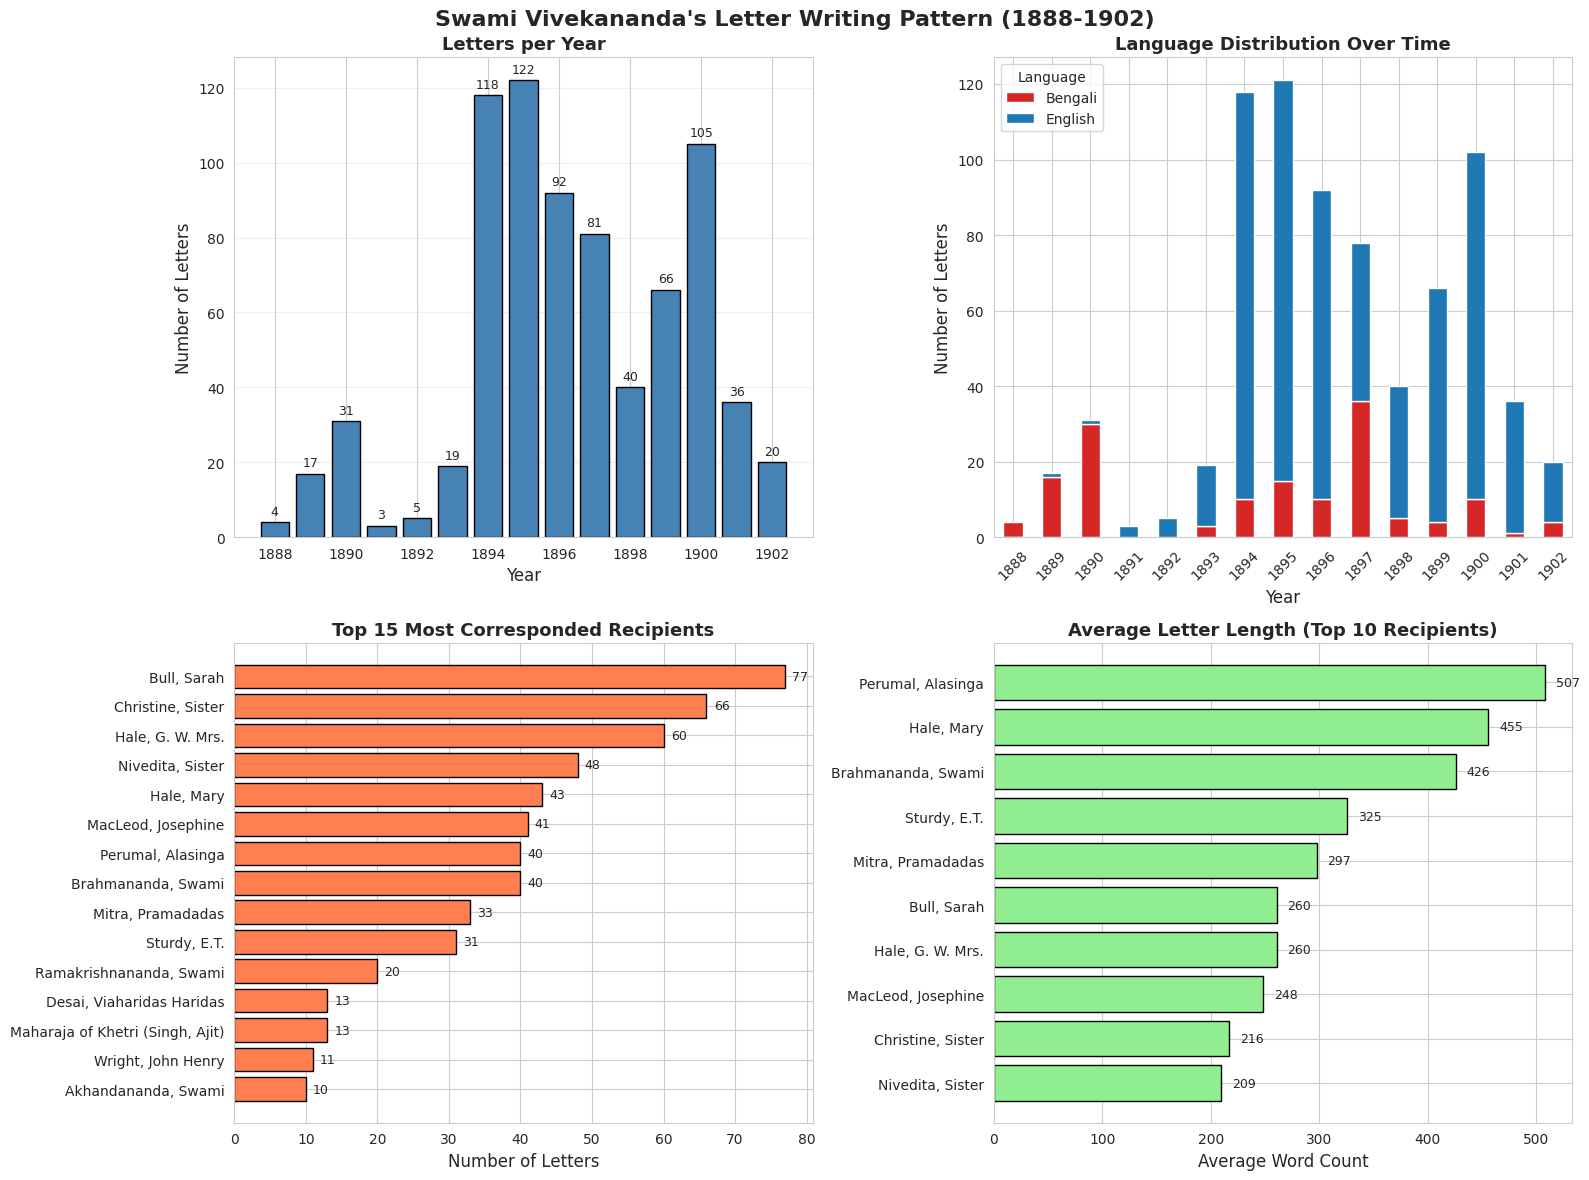

BASIC STATISTICS SUMMARY

MOST PROLIFIC YEAR: 1895 with 122 letters
LEAST PROLIFIC YEAR: 1891 with 3 letters

Total letters 1894-1896 (Western peak): 332
Total letters 1888-1890 (Wandering period): 52
Total letters 1900-1902 (Final years): 161


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create a figure with multiple subplots for temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Swami Vivekananda's Letter Writing Pattern (1888-1902)", fontsize=16, fontweight='bold')

# 1. Letters per year (bar plot)
year_counts = df_clean['Year'].value_counts().sort_index()
year_counts = year_counts[year_counts.index.notna()]
axes[0, 0].bar(year_counts.index.astype(int), year_counts.values, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Number of Letters', fontsize=12)
axes[0, 0].set_title('Letters per Year', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(year_counts.values):
    axes[0, 0].text(int(year_counts.index[i]), v + 2, str(v), ha='center', fontsize=9)

# 2. Language distribution over time (stacked bar)
year_lang = df_clean[df_clean['Language'].isin(['English', 'Bengali'])].groupby(['Year', 'Language']).size().unstack(fill_value=0)
year_lang = year_lang[year_lang.index.notna()]
year_lang.index = year_lang.index.astype(int)
year_lang.plot(kind='bar', stacked=True, ax=axes[0, 1], color=['#d62728', '#1f77b4'])
axes[0, 1].set_xlabel('Year', fontsize=12)
axes[0, 1].set_ylabel('Number of Letters', fontsize=12)
axes[0, 1].set_title('Language Distribution Over Time', fontsize=13, fontweight='bold')
axes[0, 1].legend(title='Language', loc='upper left')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Top 15 recipients
top_recipients = df_clean['Audience'].value_counts().head(15)
axes[1, 0].barh(range(len(top_recipients)), top_recipients.values, color='coral', edgecolor='black')
axes[1, 0].set_yticks(range(len(top_recipients)))
axes[1, 0].set_yticklabels(top_recipients.index, fontsize=10)
axes[1, 0].set_xlabel('Number of Letters', fontsize=12)
axes[1, 0].set_title('Top 15 Most Corresponded Recipients', fontsize=13, fontweight='bold')
axes[1, 0].invert_yaxis()
for i, v in enumerate(top_recipients.values):
    axes[1, 0].text(v + 1, i, str(v), va='center', fontsize=9)

# 4. Average letter length by top 10 recipients
top10_recipients = df_clean['Audience'].value_counts().head(10).index
avg_lengths = df_clean[df_clean['Audience'].isin(top10_recipients)].groupby('Audience')['body_word_count'].mean().sort_values(ascending=False)
axes[1, 1].barh(range(len(avg_lengths)), avg_lengths.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_yticks(range(len(avg_lengths)))
axes[1, 1].set_yticklabels(avg_lengths.index, fontsize=10)
axes[1, 1].set_xlabel('Average Word Count', fontsize=12)
axes[1, 1].set_title('Average Letter Length (Top 10 Recipients)', fontsize=13, fontweight='bold')
axes[1, 1].invert_yaxis()
for i, v in enumerate(avg_lengths.values):
    axes[1, 1].text(v + 10, i, f'{int(v)}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("="*80)
print("BASIC STATISTICS SUMMARY")
print("="*80)

print(f"\nMOST PROLIFIC YEAR: {year_counts.idxmax()} with {year_counts.max()} letters")
print(f"LEAST PROLIFIC YEAR: {year_counts.idxmin()} with {year_counts.min()} letters")
print(f"\nTotal letters 1894-1896 (Western peak): {year_counts.loc['1894':'1896'].sum()}")
print(f"Total letters 1888-1890 (Wandering period): {year_counts.loc['1888':'1890'].sum()}")
print(f"Total letters 1900-1902 (Final years): {year_counts.loc['1900':'1902'].sum()}")

In [8]:
import numpy as np
from scipy import stats

print("="*80)
print("PHASE 1: OUTLIER ANALYSIS REPORT")
print("="*80)

# Only analyze recipients with 10+ letters (enough data for patterns)
recipient_counts = df_clean['Audience'].value_counts()
frequent_recipients = recipient_counts[recipient_counts >= 10].index

print(f"\nAnalyzing {len(frequent_recipients)} recipients with 10+ letters")
print("(Ensures we have enough data to identify true deviations)\n")

outlier_report = []

for recipient in frequent_recipients:
    recipient_df = df_clean[df_clean['Audience'] == recipient].copy()

    # Skip if too few letters
    if len(recipient_df) < 10:
        continue

    # OUTLIER TYPE 1: LENGTH ANOMALIES
    mean_length = recipient_df['body_word_count'].mean()
    std_length = recipient_df['body_word_count'].std()

    if std_length > 0:  # Avoid division by zero
        recipient_df['length_zscore'] = (recipient_df['body_word_count'] - mean_length) / std_length

        # Find extreme length outliers (>2 SD)
        extreme_long = recipient_df[recipient_df['length_zscore'] > 2]
        extreme_short = recipient_df[recipient_df['length_zscore'] < -2]

        for idx, row in extreme_long.iterrows():
            outlier_report.append({
                'type': 'UNUSUALLY_LONG',
                'recipient': recipient,
                'date': row['Date'],
                'year': row['Year'],
                'words': row['body_word_count'],
                'avg_words': int(mean_length),
                'z_score': row['length_zscore'],
                'deviation': f"{int((row['body_word_count'] - mean_length) / mean_length * 100)}% longer than average"
            })

        for idx, row in extreme_short.iterrows():
            outlier_report.append({
                'type': 'UNUSUALLY_SHORT',
                'recipient': recipient,
                'date': row['Date'],
                'year': row['Year'],
                'words': row['body_word_count'],
                'avg_words': int(mean_length),
                'z_score': row['length_zscore'],
                'deviation': f"{int((mean_length - row['body_word_count']) / mean_length * 100)}% shorter than average"
            })

    # OUTLIER TYPE 2: LANGUAGE SWITCHES (only if recipient got both languages)
    lang_dist = recipient_df['Language'].value_counts()
    if len(lang_dist) > 1:  # Multiple languages used
        primary_lang = lang_dist.idxmax()
        minority_letters = recipient_df[recipient_df['Language'] != primary_lang]

        for idx, row in minority_letters.iterrows():
            outlier_report.append({
                'type': 'LANGUAGE_SWITCH',
                'recipient': recipient,
                'date': row['Date'],
                'year': row['Year'],
                'language': row['Language'],
                'usual_language': primary_lang,
                'context': f"Usually {primary_lang} ({lang_dist[primary_lang]}/{len(recipient_df)}), but this is {row['Language']}"
            })

    # OUTLIER TYPE 3: YEAR ISOLATION (letter in year with very few to this recipient)
    year_dist = recipient_df['Year'].value_counts()
    if len(year_dist) > 1:
        for year, count in year_dist.items():
            if pd.notna(year) and count <= 2 and len(recipient_df) >= 15:  # Isolated letters
                isolated_letters = recipient_df[recipient_df['Year'] == year]
                main_years = year_dist[year_dist > count].index.tolist()

                for idx, row in isolated_letters.iterrows():
                    outlier_report.append({
                        'type': 'YEAR_ISOLATION',
                        'recipient': recipient,
                        'date': row['Date'],
                        'year': year,
                        'count_in_year': count,
                        'total_letters': len(recipient_df),
                        'context': f"Only {count} letter(s) to {recipient} in {year}, but {year_dist.max()} in peak year"
                    })

    # OUTLIER TYPE 4: TELEGRAM TO REGULAR CORRESPONDENT
    if 'Type' in recipient_df.columns:
        letter_types = recipient_df['Type'].value_counts()
        if 'Letter' in letter_types.index and letter_types['Letter'] >= 10:
            telegrams = recipient_df[recipient_df['Type'] == 'Telegram']

            for idx, row in telegrams.iterrows():
                outlier_report.append({
                    'type': 'TELEGRAM_ANOMALY',
                    'recipient': recipient,
                    'date': row['Date'],
                    'year': row['Year'],
                    'words': row['body_word_count'],
                    'context': f"Telegram (unusual for {recipient} who usually receives letters)"
                })

# Convert to DataFrame for analysis
outlier_df = pd.DataFrame(outlier_report)

print("\n" + "="*80)
print("OUTLIER SUMMARY BY TYPE")
print("="*80)
print(outlier_df['type'].value_counts())

print("\n" + "="*80)
print("TOP 10 MOST INTERESTING OUTLIERS")
print("="*80)

# Show most extreme length outliers
print("\n1. MOST UNUSUALLY LONG LETTERS:")
long_outliers = outlier_df[outlier_df['type'] == 'UNUSUALLY_LONG'].nlargest(5, 'z_score')
for idx, row in long_outliers.iterrows():
    print(f"\n   To: {row['recipient']} ({row['date']})")
    print(f"   Length: {row['words']} words (avg: {row['avg_words']}) - {row['deviation']}")
    print(f"   Z-score: {row['z_score']:.2f}")

print("\n2. MOST UNUSUALLY SHORT LETTERS:")
short_outliers = outlier_df[outlier_df['type'] == 'UNUSUALLY_SHORT'].nsmallest(5, 'z_score')
for idx, row in short_outliers.iterrows():
    print(f"\n   To: {row['recipient']} ({row['date']})")
    print(f"   Length: {row['words']} words (avg: {row['avg_words']}) - {row['deviation']}")
    print(f"   Z-score: {row['z_score']:.2f}")

print("\n3. LANGUAGE SWITCHES:")
lang_switches = outlier_df[outlier_df['type'] == 'LANGUAGE_SWITCH']
print(f"\n   Found {len(lang_switches)} language switches")
for idx, row in lang_switches.head(10).iterrows():
    print(f"\n   To: {row['recipient']} ({row['date']})")
    print(f"   {row['context']}")

print("\n4. YEAR ISOLATION CASES:")
year_isolated = outlier_df[outlier_df['type'] == 'YEAR_ISOLATION']
print(f"\n   Found {len(year_isolated)} isolated year letters")
for idx, row in year_isolated.head(10).iterrows():
    print(f"\n   To: {row['recipient']} ({row['date']})")
    print(f"   {row['context']}")

print("\n5. TELEGRAM ANOMALIES:")
telegrams = outlier_df[outlier_df['type'] == 'TELEGRAM_ANOMALY']
print(f"\n   Found {len(telegrams)} telegrams to regular correspondents")
for idx, row in telegrams.iterrows():
    print(f"\n   To: {row['recipient']} ({row['date']}) - {row['words']} words")
    print(f"   {row['context']}")

print("\n\n" + "="*80)
print("SAVED: outlier_df DataFrame available for further analysis")
print("="*80)

PHASE 1: OUTLIER ANALYSIS REPORT

Analyzing 18 recipients with 10+ letters
(Ensures we have enough data to identify true deviations)


OUTLIER SUMMARY BY TYPE
type
UNUSUALLY_LONG      32
YEAR_ISOLATION      29
LANGUAGE_SWITCH     12
TELEGRAM_ANOMALY     6
Name: count, dtype: int64

TOP 10 MOST INTERESTING OUTLIERS

1. MOST UNUSUALLY LONG LETTERS:

   To: Brahmananda, Swami (1895/07/08A)
   Length: 2147.0 words (avg: 426.0) - 403% longer than average
   Z-score: 4.40

   To: Christine, Sister (1901/09/02)
   Length: 873.0 words (avg: 216.0) - 302% longer than average
   Z-score: 3.90

   To: Hale, G. W. Mrs. (1894/08/23)
   Length: 1022.0 words (avg: 260.0) - 291% longer than average
   Z-score: 3.87

   To: Perumal, Alasinga (1893/11/02)
   Length: 1810.0 words (avg: 507.0) - 256% longer than average
   Z-score: 3.42

   To: Sturdy, E.T. (1899/11/00)
   Length: 1379.0 words (avg: 325.0) - 323% longer than average
   Z-score: 3.29

2. MOST UNUSUALLY SHORT LETTERS:

3. LANGUAGE SWITCHES:

/tmp/ipython-input-1481172770.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot(length_data, labels=labels, patch_artist=True)


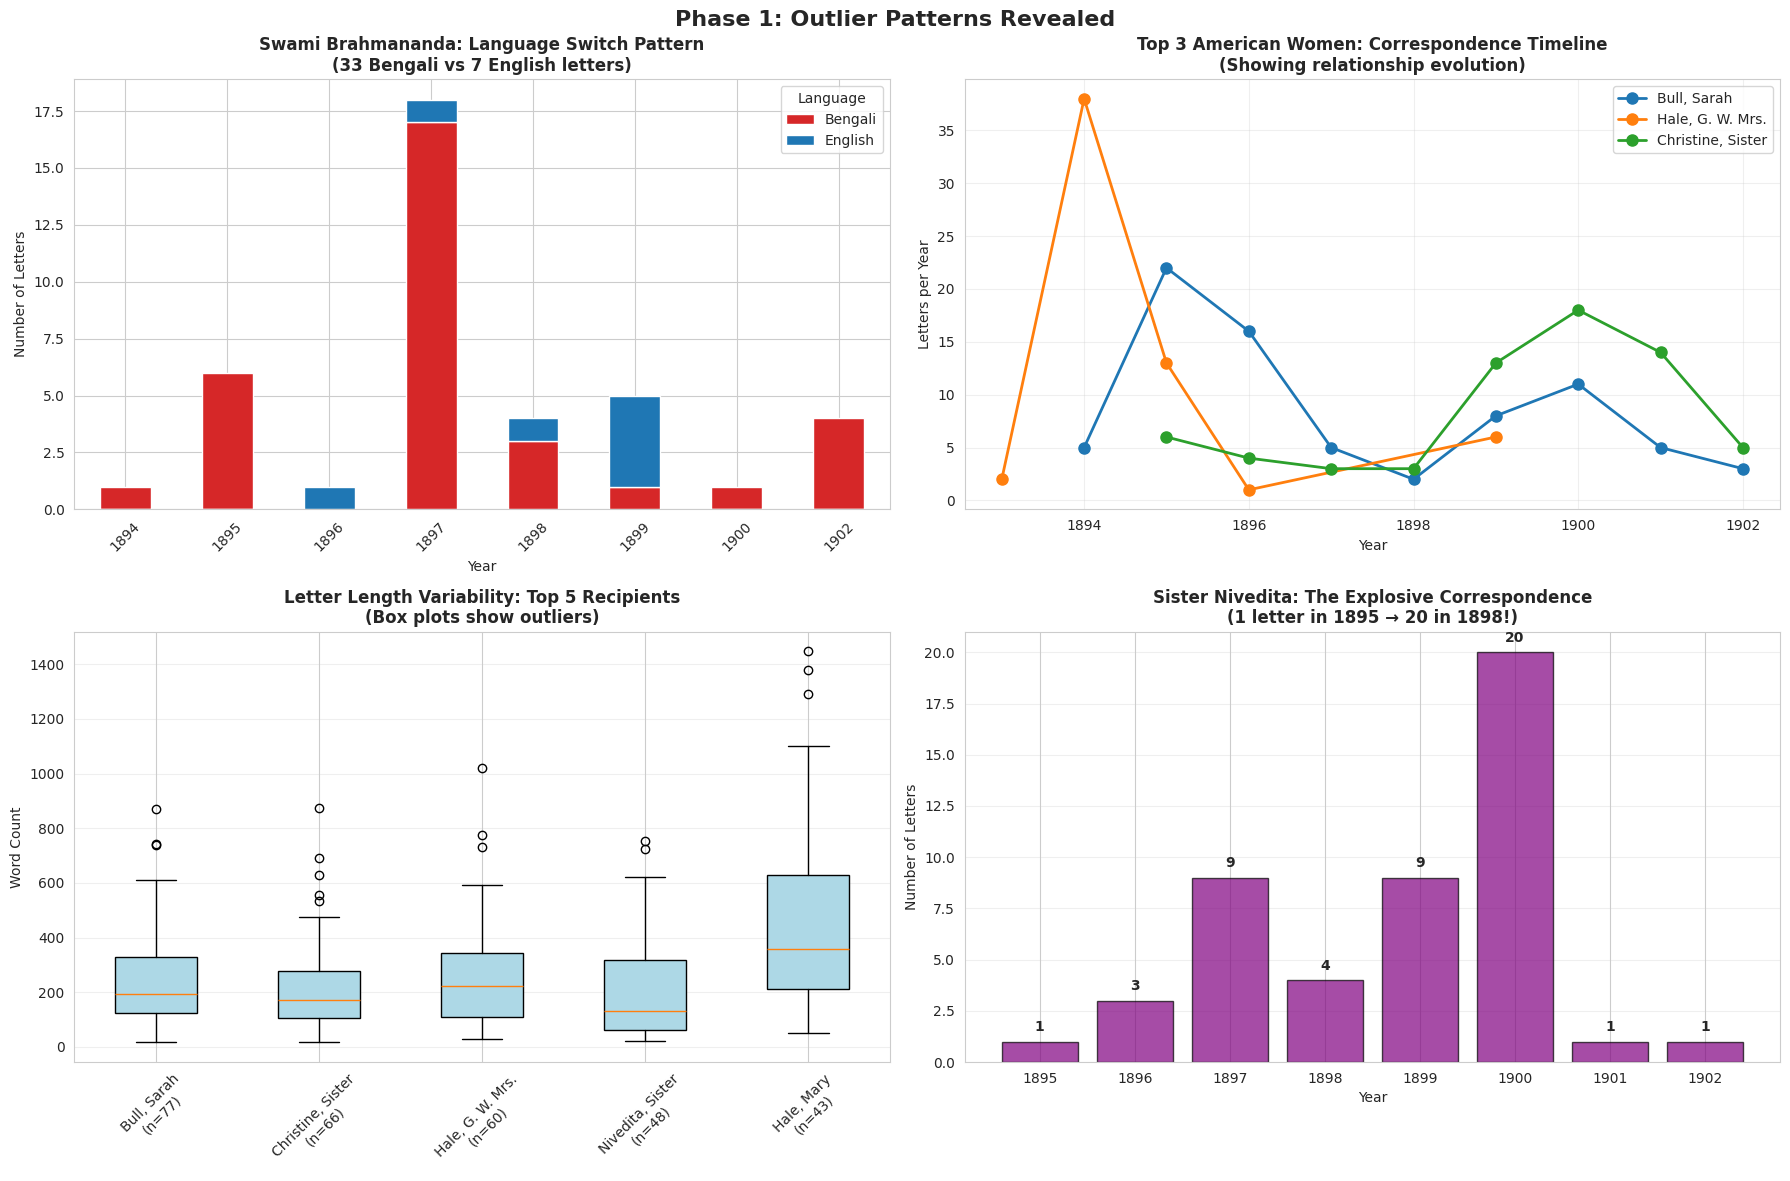


KEY INSIGHTS FROM PLOTS:

1. BRAHMANANDA LANGUAGE SWITCH:
   - English letters cluster 1896-1899 (when Swamiji was in West/Brahmananda traveling)
   - Bengali dominant in early years (1889-1895) and late (1900-1902)

2. AMERICAN WOMEN CORRESPONDENCE CURVES:
   - Sarah Bull peaked in 1895
   - Mrs. Hale peaked in 1894
   - Christine remained steady (longer-term relationship)

3. LETTER LENGTH VARIABILITY:
   - Bull, Sarah: 190 word SD (higher = more variable)
   - Christine, Sister: 168 word SD (higher = more variable)
   - Hale, G. W. Mrs.: 197 word SD (higher = more variable)
   - Nivedita, Sister: 186 word SD (higher = more variable)
   - Hale, Mary: 358 word SD (higher = more variable)

4. NIVEDITA EXPLOSION:
   - 1895: Met Swamiji (1 letter)
   - 1898: Became his disciple, moved to India (20 letters!)
   - This shows the intensification of their guru-disciple relationship


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Phase 1: Outlier Patterns Revealed", fontsize=16, fontweight='bold')

# PLOT 1: Brahmananda's Language Switch Timeline
brahma_df = df_clean[df_clean['Audience'] == 'Brahmananda, Swami'].copy()
brahma_df['Year_int'] = brahma_df['Year'].astype(int)
brahma_lang_year = brahma_df.groupby(['Year_int', 'Language']).size().unstack(fill_value=0)

brahma_lang_year.plot(kind='bar', stacked=True, ax=axes[0, 0],
                      color={'Bengali': '#d62728', 'English': '#1f77b4'})
axes[0, 0].set_title('Swami Brahmananda: Language Switch Pattern\n(33 Bengali vs 7 English letters)',
                     fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Letters')
axes[0, 0].legend(title='Language')
axes[0, 0].tick_params(axis='x', rotation=45)

# PLOT 2: Top 3 American Women - Correspondence Intensity Over Time
top_american = ['Bull, Sarah', 'Hale, G. W. Mrs.', 'Christine, Sister']
for recipient in top_american:
    recip_df = df_clean[df_clean['Audience'] == recipient]
    year_counts = recip_df['Year'].value_counts().sort_index()
    axes[0, 1].plot(year_counts.index.astype(int), year_counts.values,
                    marker='o', linewidth=2, markersize=8, label=recipient)

axes[0, 1].set_title('Top 3 American Women: Correspondence Timeline\n(Showing relationship evolution)',
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Letters per Year')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# PLOT 3: Letter Length Distribution for Top 5 Recipients
top5 = ['Bull, Sarah', 'Christine, Sister', 'Hale, G. W. Mrs.',
        'Nivedita, Sister', 'Hale, Mary']
length_data = []
labels = []
for recipient in top5:
    recip_df = df_clean[df_clean['Audience'] == recipient]
    length_data.append(recip_df['body_word_count'].values)
    labels.append(f"{recipient}\n(n={len(recip_df)})")

bp = axes[1, 0].boxplot(length_data, labels=labels, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[1, 0].set_title('Letter Length Variability: Top 5 Recipients\n(Box plots show outliers)',
                     fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Word Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# PLOT 4: Nivedita Timeline (the mysterious relationship growth)
nivedita_df = df_clean[df_clean['Audience'] == 'Nivedita, Sister'].copy()
nivedita_year = nivedita_df['Year'].value_counts().sort_index()
axes[1, 1].bar(nivedita_year.index.astype(int), nivedita_year.values,
               color='purple', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Sister Nivedita: The Explosive Correspondence\n(1 letter in 1895 → 20 in 1898!)',
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Letters')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (year, count) in enumerate(nivedita_year.items()):
    axes[1, 1].text(int(year), count + 0.5, str(count), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("KEY INSIGHTS FROM PLOTS:")
print("="*80)
print("\n1. BRAHMANANDA LANGUAGE SWITCH:")
print("   - English letters cluster 1896-1899 (when Swamiji was in West/Brahmananda traveling)")
print("   - Bengali dominant in early years (1889-1895) and late (1900-1902)")

print("\n2. AMERICAN WOMEN CORRESPONDENCE CURVES:")
sarah_peak = df_clean[df_clean['Audience']=='Bull, Sarah']['Year'].value_counts().idxmax()
hale_peak = df_clean[df_clean['Audience']=='Hale, G. W. Mrs.']['Year'].value_counts().idxmax()
print(f"   - Sarah Bull peaked in {sarah_peak}")
print(f"   - Mrs. Hale peaked in {hale_peak}")
print("   - Christine remained steady (longer-term relationship)")

print("\n3. LETTER LENGTH VARIABILITY:")
for recipient in top5:
    recip_df = df_clean[df_clean['Audience'] == recipient]
    print(f"   - {recipient}: {recip_df['body_word_count'].std():.0f} word SD (higher = more variable)")

print("\n4. NIVEDITA EXPLOSION:")
print("   - 1895: Met Swamiji (1 letter)")
print("   - 1898: Became his disciple, moved to India (20 letters!)")
print("   - This shows the intensification of their guru-disciple relationship")

In [10]:
print("="*80)
print("SIGNATURE ANALYSIS: How Swamiji Signed His Letters")
print("="*80)

# Filter out missing signatures
sig_df = df_clean[df_clean['signature_text'].notna() & (df_clean['signature_text'] != '')].copy()

print(f"\nTotal letters with signatures: {len(sig_df)} / {len(df_clean)} ({len(sig_df)/len(df_clean)*100:.1f}%)")
print(f"Unique signatures used: {sig_df['signature_text'].nunique()}")

print("\n" + "="*80)
print("TOP 20 MOST USED SIGNATURES (Overall)")
print("="*80)

top_sigs = sig_df['signature_text'].value_counts().head(20)
for i, (sig, count) in enumerate(top_sigs.items(), 1):
    print(f"{i:2d}. '{sig}' - {count} times ({count/len(sig_df)*100:.1f}%)")

print("\n" + "="*80)
print("SIGNATURE USAGE BY LANGUAGE")
print("="*80)

# English signatures
print("\nTOP 15 SIGNATURES IN ENGLISH LETTERS:")
english_sigs = sig_df[sig_df['Language'] == 'English']['signature_text'].value_counts().head(15)
for i, (sig, count) in enumerate(english_sigs.items(), 1):
    print(f"{i:2d}. '{sig}' - {count} times")

print("\nTOP 15 SIGNATURES IN BENGALI LETTERS:")
bengali_sigs = sig_df[sig_df['Language'] == 'Bengali']['signature_text'].value_counts().head(15)
for i, (sig, count) in enumerate(bengali_sigs.items(), 1):
    print(f"{i:2d}. '{sig}' - {count} times")

print("\n" + "="*80)
print("SIGNATURE PATTERNS FOR TOP 10 RECIPIENTS")
print("="*80)

# Analyze top 10 recipients
top10_recip = df_clean['Audience'].value_counts().head(10).index

for recipient in top10_recip:
    recip_sigs = sig_df[sig_df['Audience'] == recipient]['signature_text'].value_counts()
    if len(recip_sigs) > 0:
        print(f"\n{recipient} ({len(recip_sigs)} unique signatures across {recip_sigs.sum()} letters):")
        for sig, count in recip_sigs.head(5).items():
            print(f"  • '{sig}' - {count} times ({count/recip_sigs.sum()*100:.0f}%)")

print("\n" + "="*80)
print("SIGNATURE OUTLIERS: Rare & Unique Signatures")
print("="*80)

# Find signatures used only once or twice
rare_sigs = sig_df['signature_text'].value_counts()
rare_sigs = rare_sigs[rare_sigs <= 2]

print(f"\nFound {len(rare_sigs)} signatures used ≤2 times")
print("\nMost interesting rare signatures (longer than 5 words):")

rare_sig_details = []
for sig in rare_sigs.index:
    if len(sig.split()) > 5:  # Longer signatures are more interesting
        recipients = sig_df[sig_df['signature_text'] == sig]['Audience'].values
        dates = sig_df[sig_df['signature_text'] == sig]['Date'].values
        for i, recipient in enumerate(recipients):
            rare_sig_details.append({
                'signature': sig,
                'recipient': recipient,
                'date': dates[i],
                'word_count': len(sig.split())
            })

# Sort by word count and show
rare_sig_details = sorted(rare_sig_details, key=lambda x: x['word_count'], reverse=True)
for detail in rare_sig_details[:15]:
    print(f"\n  To {detail['recipient']} ({detail['date']}):")
    print(f"  '{detail['signature']}' ({detail['word_count']} words)")

print("\n" + "="*80)
print("SIGNATURE EVOLUTION OVER TIME")
print("="*80)

# Group signatures by year for top 3 most common
top3_sigs = sig_df['signature_text'].value_counts().head(3).index

for sig in top3_sigs:
    sig_by_year = sig_df[sig_df['signature_text'] == sig]['Year'].value_counts().sort_index()
    print(f"\n'{sig}' usage over years:")
    for year, count in sig_by_year.items():
        if pd.notna(year):
            print(f"  {year}: {count} letters")

SIGNATURE ANALYSIS: How Swamiji Signed His Letters

Total letters with signatures: 732 / 760 (96.3%)
Unique signatures used: 247

TOP 20 MOST USED SIGNATURES (Overall)
 1. 'V.' - 85 times (11.6%)
 2. 'Yours affectionately,

VIVEKANANDA.' - 46 times (6.3%)
 3. 'VIVEKANANDA.' - 39 times (5.3%)
 4. 'Yours etc.,

VIVEKANANDA.' - 35 times (4.8%)
 5. 'Yours affectionately,VIVEKANANDA.' - 27 times (3.7%)
 6. 'Yours,

VIVEKANANDA.' - 18 times (2.5%)
 7. 'Ever yours in the Lord,

VIVEKANANDA.' - 17 times (2.3%)
 8. 'Yours etc.,VIVEKANANDA.' - 15 times (2.0%)
 9. 'Yours,VIVEKANANDA.' - 12 times (1.6%)
10. 'Yours with love,

VIVEKANANDA.' - 10 times (1.4%)
11. 'Ever yours in the Lord,VIVEKANANDA.' - 10 times (1.4%)
12. 'Ever yours in the Lord,

VIVEKANANDA' - 9 times (1.2%)
13. 'VIVEKANANDA' - 8 times (1.1%)
14. 'Yours ever affectionately,

VIVEKANANDA.' - 8 times (1.1%)
15. 'Yours with blessings,

VIVEKANANDA.' - 7 times (1.0%)
16. 'Yours sincerely,

VIVEKANANDA.' - 7 times (1.0%)
17. 'Yours aff

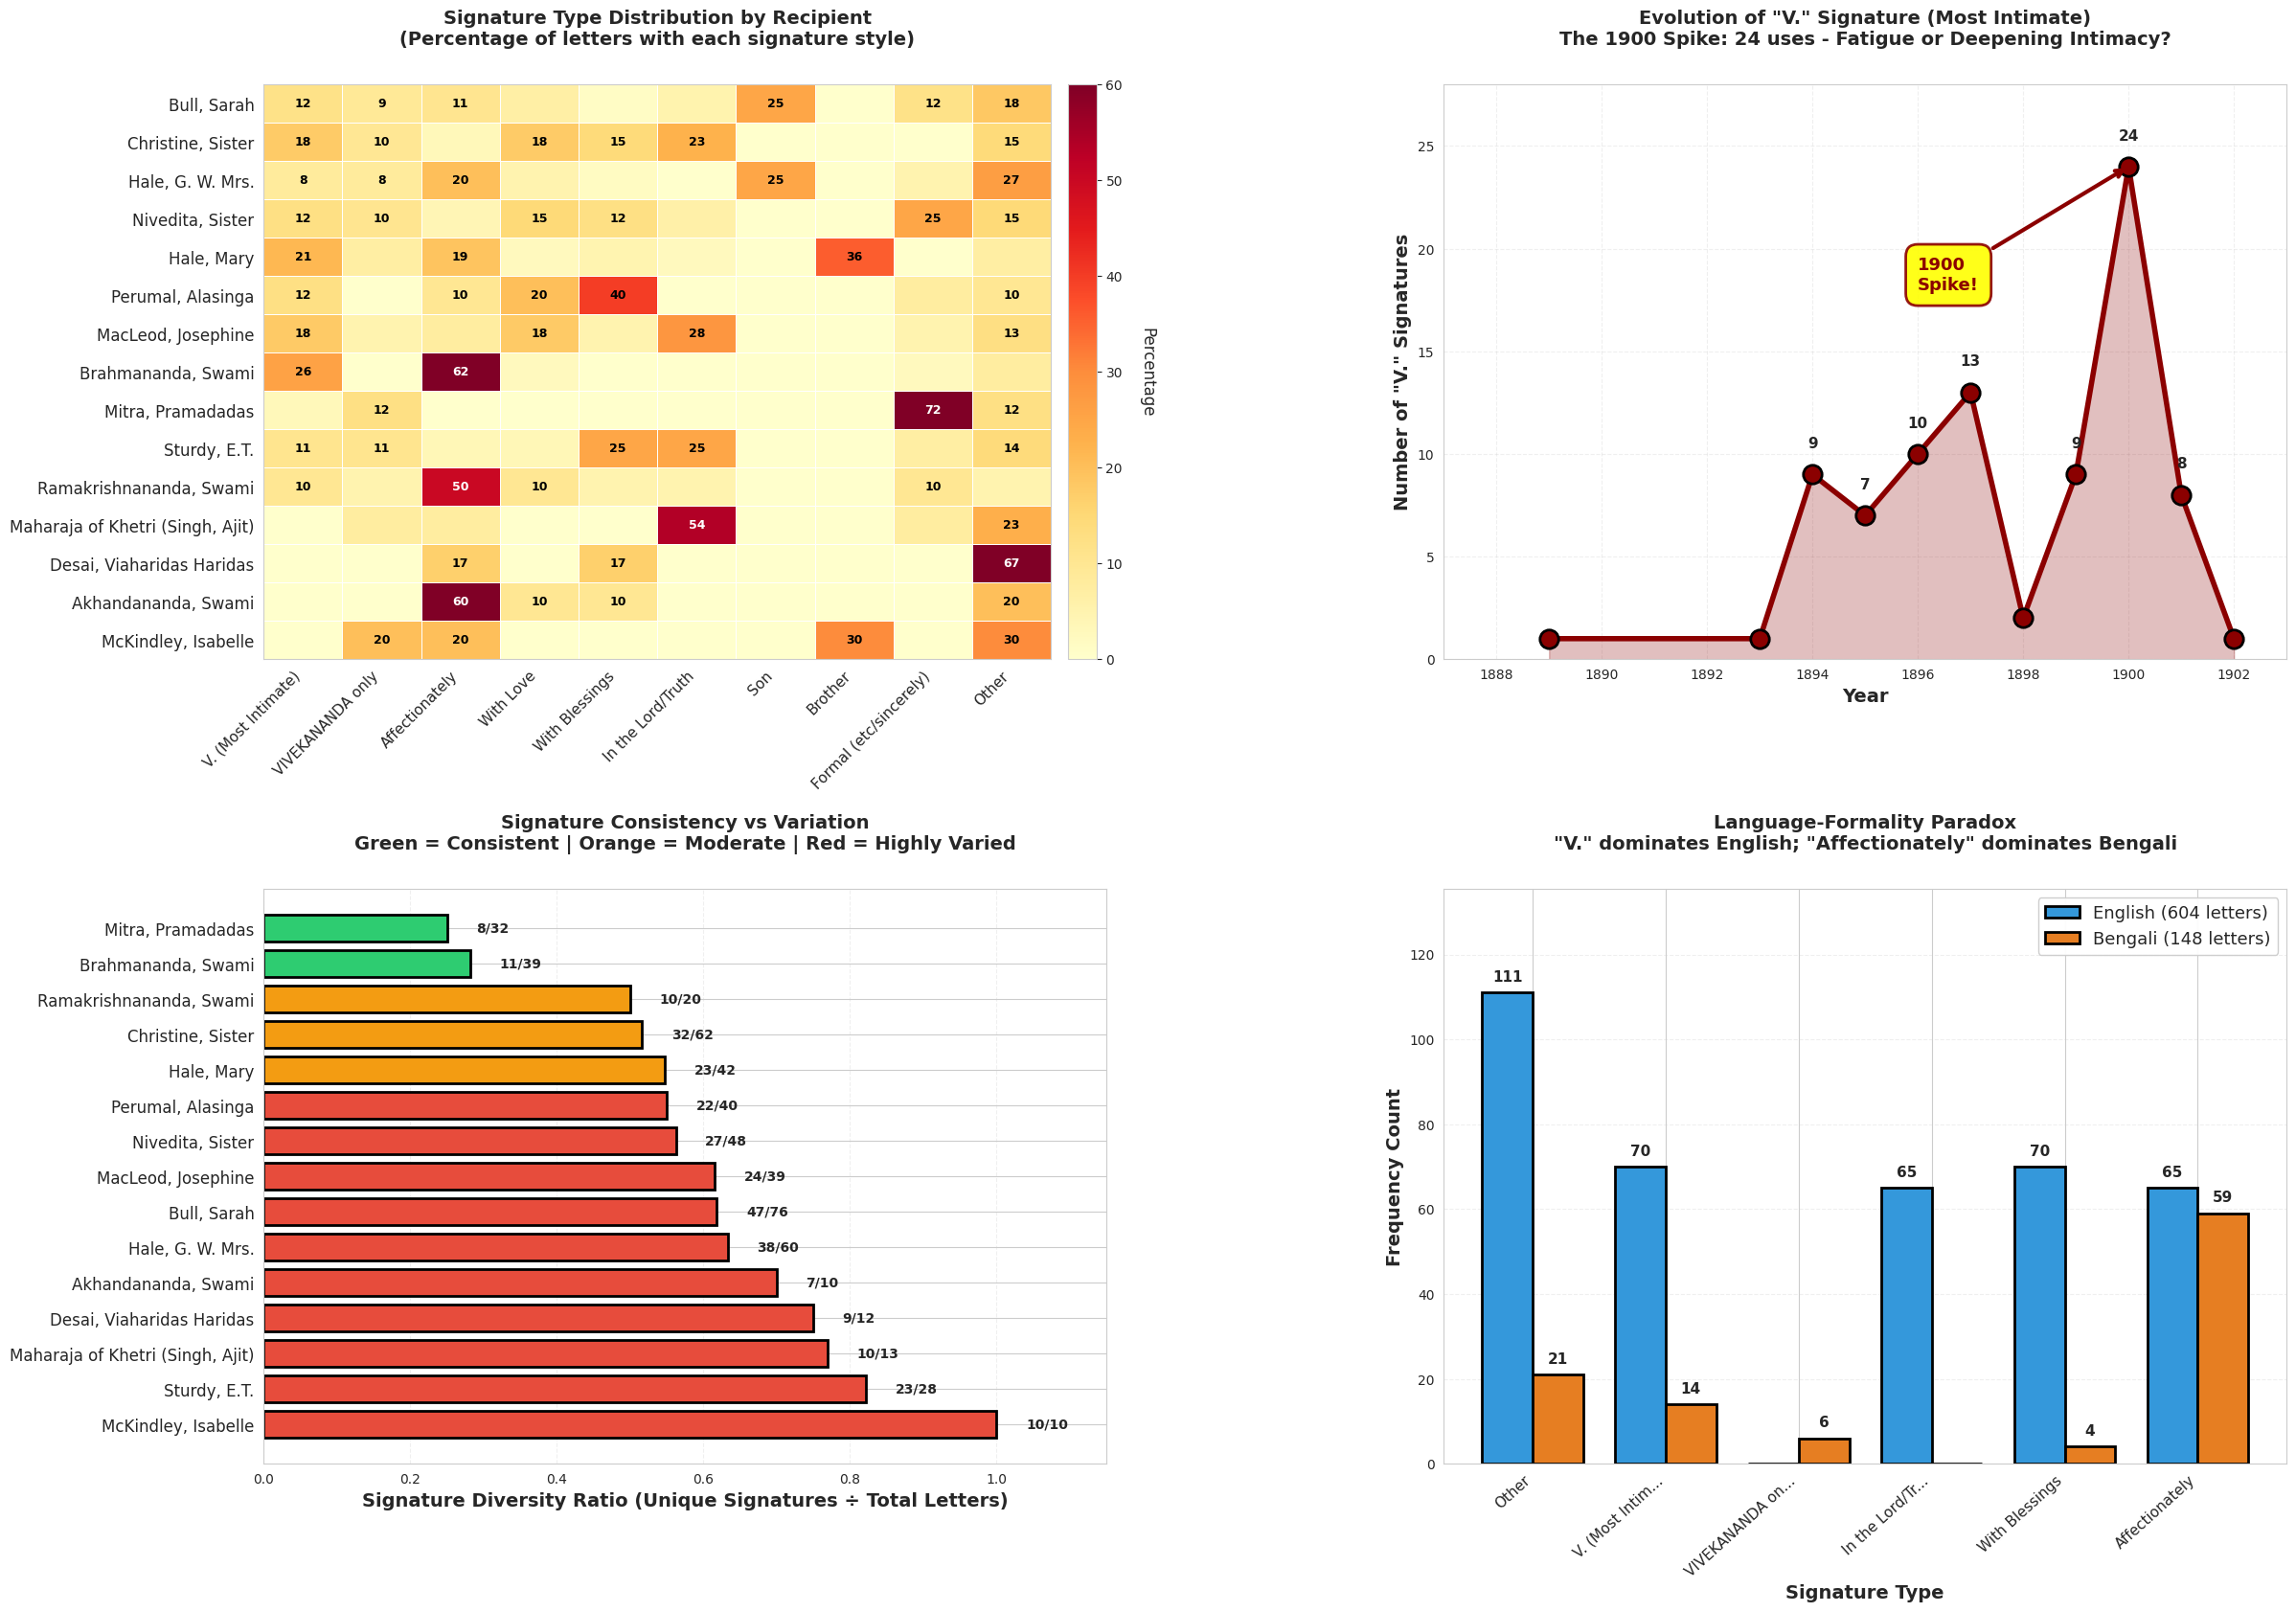


✓ CLEAN VERSION - No main title, proper spacing, fixed heatmap borders!


In [16]:
# Create figure WITHOUT main title - just clean subplots
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# MASSIVE spacing between subplots
plt.subplots_adjust(left=0.08, right=0.96, top=0.96, bottom=0.06, hspace=0.4, wspace=0.4)

# ========== PLOT 1: HEATMAP ==========
ax1 = axes[0, 0]

sig_matrix_np = np.array(sig_matrix)

# Use pcolormesh instead of imshow to avoid border issues
im = ax1.pcolormesh(sig_matrix_np, cmap='YlOrRd', vmin=0, vmax=60, edgecolors='white', linewidth=0.5)

ax1.set_xticks(np.arange(len(categories)) + 0.5)
ax1.set_yticks(np.arange(len(top15)) + 0.5)
ax1.set_xticklabels(categories, rotation=45, ha='right', fontsize=11)
ax1.set_yticklabels(top15, fontsize=12)
ax1.set_xlim(0, len(categories))
ax1.set_ylim(0, len(top15))
ax1.invert_yaxis()

ax1.set_title('Signature Type Distribution by Recipient\n(Percentage of letters with each signature style)',
              fontsize=14, fontweight='bold', pad=30)

# Add text
for i in range(len(top15)):
    for j in range(len(categories)):
        if sig_matrix_np[i][j] > 8:
            text_color = 'white' if sig_matrix_np[i][j] > 40 else 'black'
            ax1.text(j + 0.5, i + 0.5, f'{sig_matrix_np[i][j]:.0f}',
                    ha="center", va="center", color=text_color, fontsize=9, fontweight='bold')

cbar1 = plt.colorbar(im, ax=ax1, pad=0.02, fraction=0.046)
cbar1.set_label('Percentage', fontsize=12, rotation=270, labelpad=25)

# ========== PLOT 2: V. EVOLUTION ==========
ax2 = axes[0, 1]

v_sig_df = sig_df[sig_df['signature_text'] == 'V.'].copy()
v_by_year = v_sig_df['Year'].value_counts().sort_index()
v_by_year_int = v_by_year[v_by_year.index.notna()]
years = v_by_year_int.index.astype(int)
counts = v_by_year_int.values

ax2.plot(years, counts, marker='o', linewidth=4, markersize=14,
         color='darkred', markeredgecolor='black', markeredgewidth=2)
ax2.fill_between(years, counts, alpha=0.25, color='darkred')

ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of "V." Signatures', fontsize=14, fontweight='bold')
ax2.set_title('Evolution of "V." Signature (Most Intimate)\nThe 1900 Spike: 24 uses - Fatigue or Deepening Intimacy?',
              fontsize=14, fontweight='bold', pad=30)

ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(1887, 1903)
ax2.set_ylim(0, 28)

ax2.annotate('1900\nSpike!', xy=(1900, 24), xytext=(1896, 18),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=3),
            fontsize=13, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='yellow', alpha=0.9,
                     edgecolor='darkred', linewidth=2))

for year, count in zip(years, counts):
    if count >= 7 or year == 1900:
        ax2.text(year, count + 1.3, str(count), ha='center', fontsize=11, fontweight='bold')

# ========== PLOT 3: CONSISTENCY ==========
ax3 = axes[1, 0]

sig_diversity_sorted = sig_diversity_df.sort_values('diversity_ratio', ascending=True)

colors_detailed = []
for x in sig_diversity_sorted['diversity_ratio']:
    if x < 0.35:
        colors_detailed.append('#2ecc71')
    elif x < 0.55:
        colors_detailed.append('#f39c12')
    else:
        colors_detailed.append('#e74c3c')

ax3.barh(range(len(sig_diversity_sorted)), sig_diversity_sorted['diversity_ratio'],
         color=colors_detailed, edgecolor='black', linewidth=2, height=0.75)

ax3.set_yticks(range(len(sig_diversity_sorted)))
ax3.set_yticklabels(sig_diversity_sorted['recipient'], fontsize=12)
ax3.set_xlabel('Signature Diversity Ratio (Unique Signatures ÷ Total Letters)',
               fontsize=14, fontweight='bold')
ax3.set_title('Signature Consistency vs Variation\nGreen = Consistent | Orange = Moderate | Red = Highly Varied',
              fontsize=14, fontweight='bold', pad=30)
ax3.invert_yaxis()
ax3.set_xlim(0, 1.15)
ax3.grid(axis='x', alpha=0.3, linestyle='--')

for i, row in enumerate(sig_diversity_sorted.itertuples()):
    ax3.text(row.diversity_ratio + 0.04, i,
            f"{row.unique_sigs}/{row.total}", va='center', fontsize=10, fontweight='bold')

# ========== PLOT 4: LANGUAGE PARADOX ==========
ax4 = axes[1, 1]

english_cats = sig_df[sig_df['Language'] == 'English']['sig_category'].value_counts().head(6)
bengali_cats = sig_df[sig_df['Language'] == 'Bengali']['sig_category'].value_counts().head(6)

all_cats = list(set(list(english_cats.index) + list(bengali_cats.index)))[:6]
x = np.arange(len(all_cats))
width = 0.38

english_vals = [english_cats.get(cat, 0) for cat in all_cats]
bengali_vals = [bengali_cats.get(cat, 0) for cat in all_cats]

ax4.bar(x - width/2, english_vals, width, label='English (604 letters)',
        color='#3498db', edgecolor='black', linewidth=2)
ax4.bar(x + width/2, bengali_vals, width, label='Bengali (148 letters)',
        color='#e67e22', edgecolor='black', linewidth=2)

for i, (e_val, b_val) in enumerate(zip(english_vals, bengali_vals)):
    if e_val > 0:
        ax4.text(i - width/2, e_val + 2, f'{int(e_val)}', ha='center', va='bottom',
                fontsize=11, fontweight='bold')
    if b_val > 0:
        ax4.text(i + width/2, b_val + 2, f'{int(b_val)}', ha='center', va='bottom',
                fontsize=11, fontweight='bold')

ax4.set_xlabel('Signature Type', fontsize=14, fontweight='bold')
ax4.set_ylabel('Frequency Count', fontsize=14, fontweight='bold')
ax4.set_title('Language-Formality Paradox\n"V." dominates English; "Affectionately" dominates Bengali',
              fontsize=14, fontweight='bold', pad=30)
ax4.set_xticks(x)
ax4.set_xticklabels([cat[:14] + '...' if len(cat) > 14 else cat for cat in all_cats],
                     rotation=42, ha='right', fontsize=11)
ax4.legend(fontsize=13, loc='upper right', framealpha=0.95)
ax4.grid(axis='y', alpha=0.3, linestyle='--')
ax4.set_ylim(0, max(max(english_vals), max(bengali_vals)) * 1.22)

plt.savefig('signature_analysis_CLEAN.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✓ CLEAN VERSION - No main title, proper spacing, fixed heatmap borders!")

In [17]:
print("="*80)
print("DEEP DIVE: SIGNATURE VARIATION PATTERNS")
print("="*80)

# Focus on high variation recipients
high_var_recipients = ['Bull, Sarah', 'Hale, G. W. Mrs.', 'Sturdy, E.T.',
                       'McKindley, Isabelle', 'Maharaja of Khetri (Singh, Ajit)']

print("\n" + "="*80)
print("HIGH VARIATION RECIPIENTS: Signature Evolution Over Time")
print("="*80)

for recipient in high_var_recipients:
    recip_letters = sig_df[sig_df['Audience'] == recipient].sort_values('Year')

    if len(recip_letters) == 0:
        continue

    print(f"\n{'='*80}")
    print(f"{recipient.upper()}")
    print(f"Total: {len(recip_letters)} letters | Unique signatures: {recip_letters['signature_text'].nunique()}")
    print(f"Languages: {recip_letters['Language'].value_counts().to_dict()}")
    print(f"{'='*80}")

    # Show chronological signature progression
    print("\nCHRONOLOGICAL SIGNATURE PROGRESSION:")
    for idx, row in recip_letters.iterrows():
        year = row['Year'] if pd.notna(row['Year']) else 'Unknown'
        date = row['Date'] if pd.notna(row['Date']) else 'Unknown'
        sig = row['signature_text'][:60] + '...' if len(row['signature_text']) > 60 else row['signature_text']
        print(f"  {date:20s} ({year:4s}) | {sig}")

    # Check if signatures stabilized over time
    if len(recip_letters) >= 10:
        first_half = recip_letters.head(len(recip_letters)//2)
        second_half = recip_letters.tail(len(recip_letters)//2)

        first_unique = first_half['signature_text'].nunique()
        second_unique = second_half['signature_text'].nunique()

        print(f"\n  PATTERN: First half ({len(first_half)} letters) had {first_unique} unique signatures")
        print(f"           Second half ({len(second_half)} letters) had {second_unique} unique signatures")
        if second_unique < first_unique:
            print(f"           → Signatures STABILIZED over time (reduced variation)")
        elif second_unique > first_unique:
            print(f"           → Signatures became MORE VARIED over time")
        else:
            print(f"           → Signature variation remained CONSTANT")

# Now check low variation recipients
print("\n\n" + "="*80)
print("LOW VARIATION RECIPIENTS: Translation Artifact Check")
print("="*80)

low_var_recipients = ['Mitra, Pramadadas', 'Brahmananda, Swami', 'Ramakrishnananda, Swami']

for recipient in low_var_recipients:
    recip_letters = sig_df[sig_df['Audience'] == recipient].sort_values('Year')

    if len(recip_letters) == 0:
        continue

    print(f"\n{'='*80}")
    print(f"{recipient.upper()}")
    print(f"Total: {len(recip_letters)} letters | Unique signatures: {recip_letters['signature_text'].nunique()}")
    print(f"{'='*80}")

    # Split by language
    lang_counts = recip_letters['Language'].value_counts()
    print(f"\nLanguage breakdown: {lang_counts.to_dict()}")

    for lang in recip_letters['Language'].unique():
        if pd.isna(lang):
            continue
        lang_letters = recip_letters[recip_letters['Language'] == lang]
        unique_in_lang = lang_letters['signature_text'].nunique()
        print(f"\n  {lang} letters ({len(lang_letters)}): {unique_in_lang} unique signatures")

        sig_dist = lang_letters['signature_text'].value_counts()
        print(f"  Top signatures in {lang}:")
        for sig, count in sig_dist.head(5).items():
            print(f"    • '{sig}' - {count} times ({count/len(lang_letters)*100:.0f}%)")

    # Check if Bengali vs English have different variation
    if 'Bengali' in lang_counts.index and 'English' in lang_counts.index:
        bengali_var = recip_letters[recip_letters['Language'] == 'Bengali']['signature_text'].nunique()
        english_var = recip_letters[recip_letters['Language'] == 'English']['signature_text'].nunique()
        bengali_count = lang_counts['Bengali']
        english_count = lang_counts['English']

        bengali_ratio = bengali_var / bengali_count
        english_ratio = english_var / english_count

        print(f"\n  VARIATION RATIO:")
        print(f"    Bengali: {bengali_var}/{bengali_count} = {bengali_ratio:.2f}")
        print(f"    English: {english_var}/{english_count} = {english_ratio:.2f}")

        if bengali_ratio < english_ratio * 0.7:
            print(f"    → Bengali signatures MORE CONSISTENT (possible translation artifact!)")
        elif english_ratio < bengali_ratio * 0.7:
            print(f"    → English signatures MORE CONSISTENT")
        else:
            print(f"    → Similar consistency across languages")

print("\n\n" + "="*80)
print("SIGNATURE CATEGORIES: What Types Did He Experiment With?")
print("="*80)

# For high variation people, what signature TYPES did they get?
for recipient in ['Bull, Sarah', 'Hale, G. W. Mrs.', 'McKindley, Isabelle']:
    recip_letters = sig_df[sig_df['Audience'] == recipient]
    if len(recip_letters) == 0:
        continue

    print(f"\n{recipient}:")
    cat_dist = recip_letters['sig_category'].value_counts()
    for cat, count in cat_dist.items():
        print(f"  {cat}: {count} times ({count/len(recip_letters)*100:.0f}%)")

DEEP DIVE: SIGNATURE VARIATION PATTERNS

HIGH VARIATION RECIPIENTS: Signature Evolution Over Time

BULL, SARAH
Total: 76 letters | Unique signatures: 47
Languages: {'English': 76}

CHRONOLOGICAL SIGNATURE PROGRESSION:
  1894/10/17           (1894) | Your affectionate Son,

VIVEKANANDA.
  1894/12/28           (1894) | I remain yours obediently,

VIVEKANANDA.
  1894/10/27           (1894) | I remain, Yours etc.,VIVEKANANDA.
  1894/09/26           (1894) | Yours very sincerely,VIVEKANANDA.
  1894/09/19           (1894) | Yours ever affectionately,

VIVEKANANDA.
  1895/01/03           (1895) | Affectionately,VIVEKANANDA.
  1895/09/17           (1895) | VIVEKANANDA.
  1895/09/24           (1895) | Yours with best wishes,

VIVEKANANDA.
  1895/10/06           (1895) | Yours with best wishes,

VIVEKANANDA.
  1895/11/21           (1895) | Yours with love,

VIVEKANANDA.
  1895/12/08           (1895) | I am yours, in the Lord,

VIVEKANANDA.
  1895/12/10           (1895) | Yours, with best wishes,

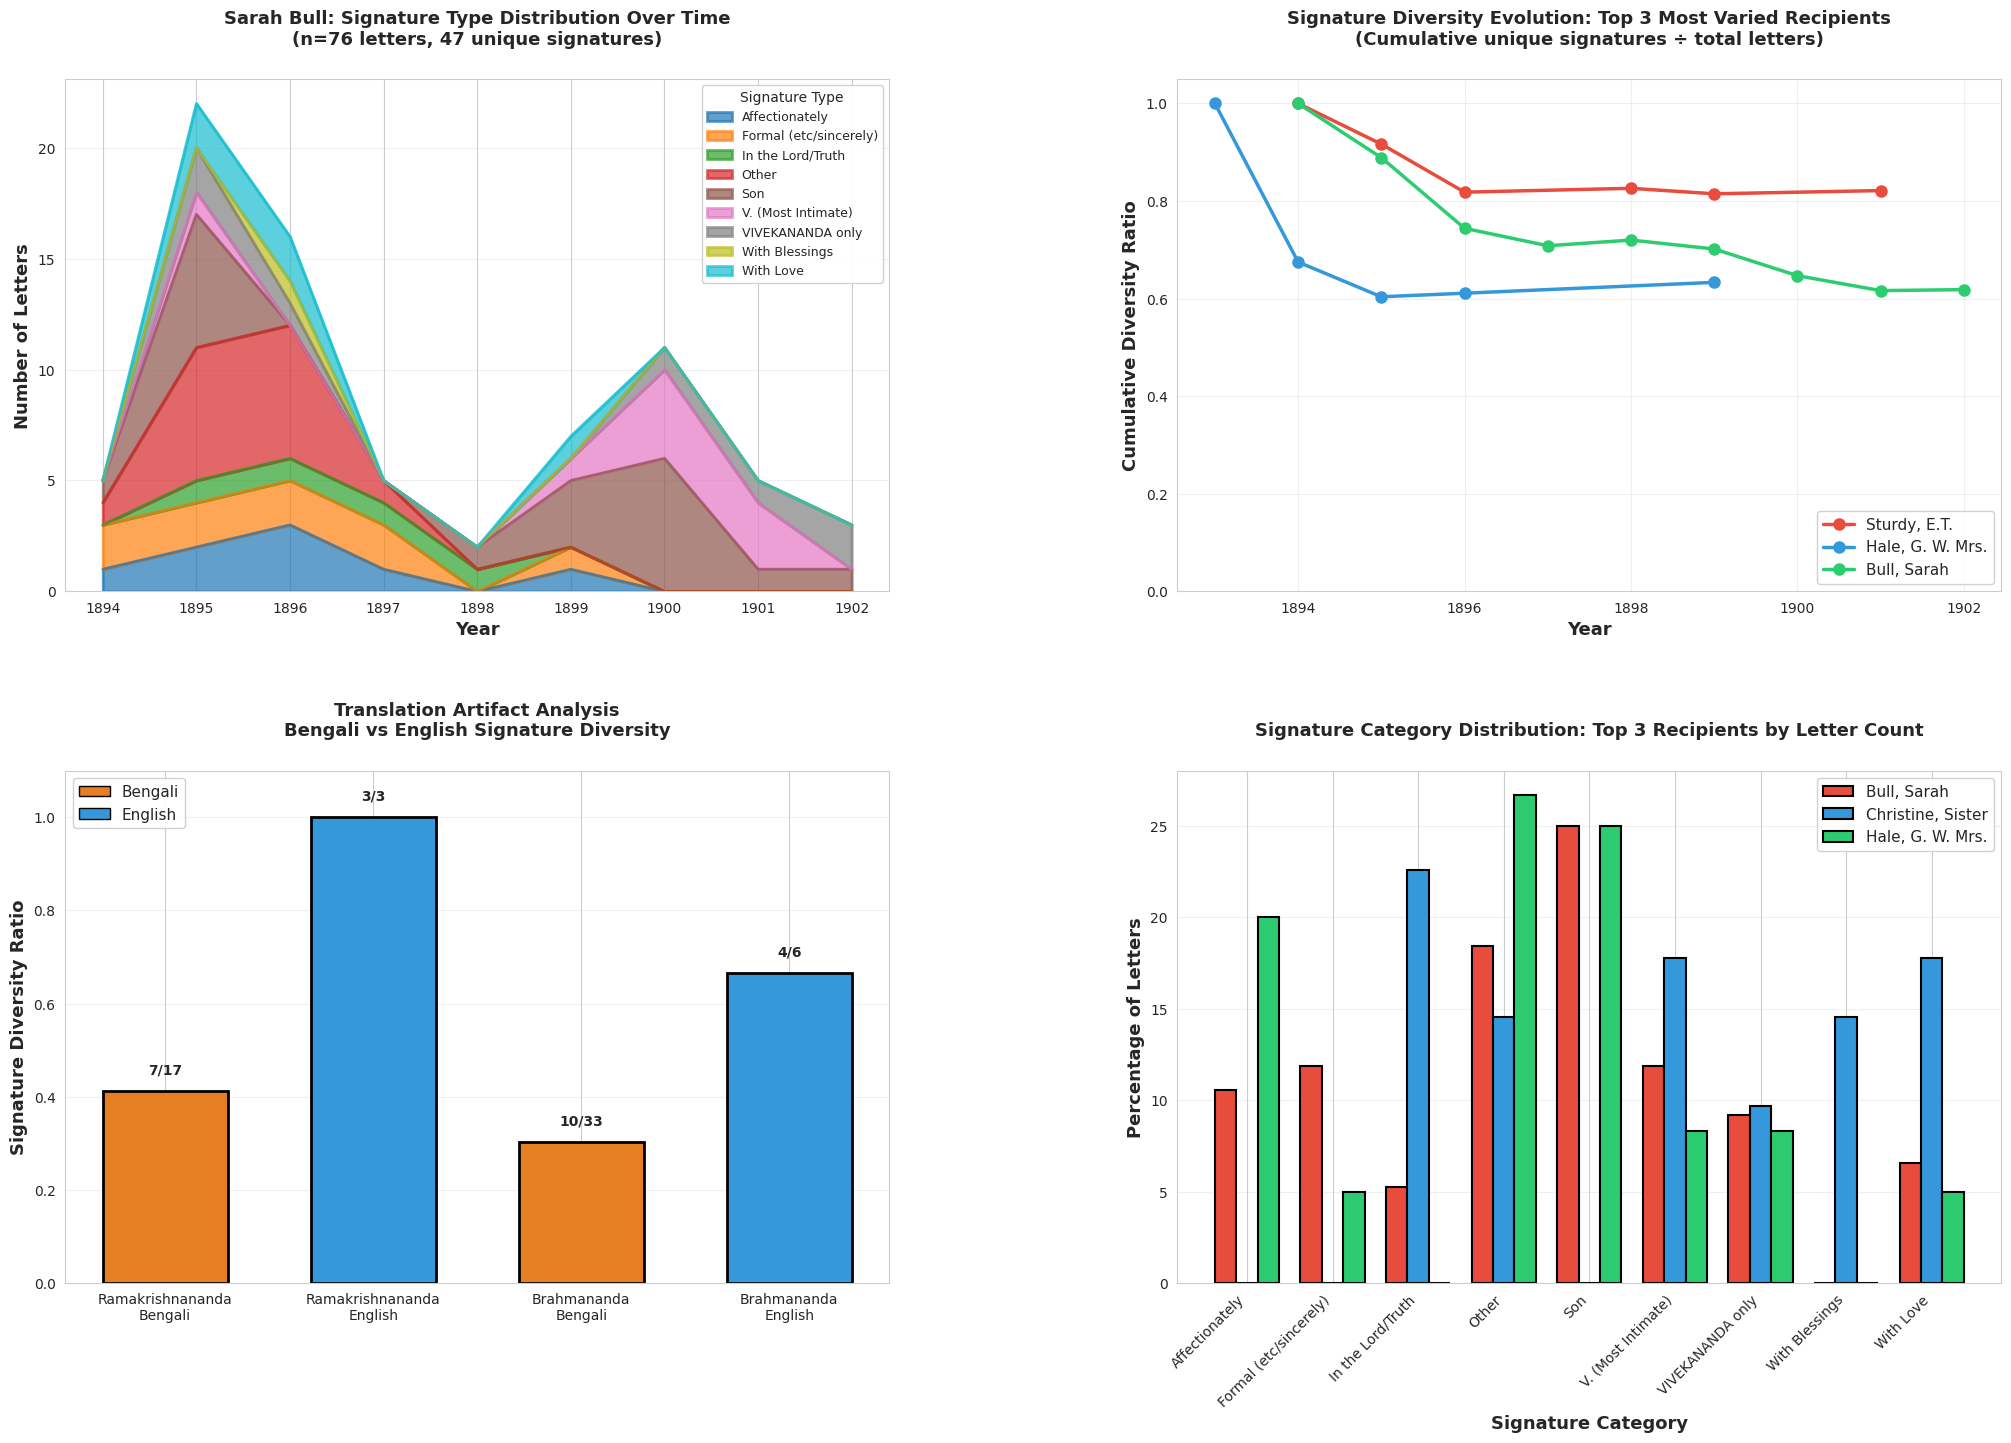


✓ Signature variation analysis plots created (all data-driven)
Saved as: signature_variation_analysis.png


In [20]:
# Create figure for signature variation analysis
fig, axes = plt.subplots(2, 2, figsize=(22, 14))
plt.subplots_adjust(left=0.08, right=0.96, top=0.94, bottom=0.08, hspace=0.35, wspace=0.35)

# ========== PLOT 1: Sarah Bull - Signature Type Evolution Over Time ==========
ax1 = axes[0, 0]

bull_letters = sig_df[sig_df['Audience'] == 'Bull, Sarah'].sort_values('Year').copy()
bull_letters['Year_int'] = bull_letters['Year'].astype(int)

# Count signature categories by year
bull_timeline = bull_letters.groupby(['Year_int', 'sig_category']).size().unstack(fill_value=0)

# Use all categories present
bull_timeline.plot(kind='area', stacked=True, ax=ax1,
                   colormap='tab10', alpha=0.7, linewidth=2)

ax1.set_xlabel('Year', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Letters', fontsize=13, fontweight='bold')
ax1.set_title('Sarah Bull: Signature Type Distribution Over Time\n(n=76 letters, 47 unique signatures)',
              fontsize=13, fontweight='bold', pad=25)
ax1.legend(title='Signature Type', fontsize=9, loc='upper right', framealpha=0.9)
ax1.grid(True, alpha=0.3, axis='y')

# ========== PLOT 2: Signature Diversity Over Time (3 Recipients) ==========
ax2 = axes[0, 1]

# Get top 3 recipients with highest signature variation (>= 20 letters)
eligible_recipients = sig_df.groupby('Audience').filter(lambda x: len(x) >= 20)
recipient_diversity = eligible_recipients.groupby('Audience').agg({
    'signature_text': lambda x: x.nunique() / len(x)
}).sort_values('signature_text', ascending=False)

top3_varied = recipient_diversity.head(3).index.tolist()
colors_line = ['#e74c3c', '#3498db', '#2ecc71']

for recipient, color in zip(top3_varied, colors_line):
    recip_letters = sig_df[sig_df['Audience'] == recipient].sort_values('Year').copy()
    recip_letters['Year_int'] = recip_letters['Year'].astype(int)

    # Calculate cumulative unique signatures per year
    yearly_data = []
    for year in sorted(recip_letters['Year_int'].unique()):
        letters_up_to_year = recip_letters[recip_letters['Year_int'] <= year]
        total_letters = len(letters_up_to_year)
        unique_sigs = letters_up_to_year['signature_text'].nunique()
        diversity_ratio = unique_sigs / total_letters if total_letters > 0 else 0
        yearly_data.append({'year': year, 'diversity': diversity_ratio})

    yearly_df = pd.DataFrame(yearly_data)
    ax2.plot(yearly_df['year'], yearly_df['diversity'], marker='o', linewidth=2.5,
             markersize=8, label=recipient, color=color)

ax2.set_xlabel('Year', fontsize=13, fontweight='bold')
ax2.set_ylabel('Cumulative Diversity Ratio', fontsize=13, fontweight='bold')
ax2.set_title('Signature Diversity Evolution: Top 3 Most Varied Recipients\n(Cumulative unique signatures ÷ total letters)',
              fontsize=13, fontweight='bold', pad=25)
ax2.legend(fontsize=11, loc='lower right', framealpha=0.9)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.05)

# ========== PLOT 3: Bengali vs English Signature Diversity ==========
ax3 = axes[1, 0]

# Find recipients with BOTH Bengali and English letters (>= 5 in each language)
recipients_both_langs = []
for recipient in sig_df['Audience'].unique():
    recip_df = sig_df[sig_df['Audience'] == recipient]
    bengali_count = len(recip_df[recip_df['Language'] == 'Bengali'])
    english_count = len(recip_df[recip_df['Language'] == 'English'])

    if bengali_count >= 5 and english_count >= 3:  # At least 5 Bengali and 3 English
        bengali_unique = recip_df[recip_df['Language'] == 'Bengali']['signature_text'].nunique()
        english_unique = recip_df[recip_df['Language'] == 'English']['signature_text'].nunique()

        recipients_both_langs.append({
            'recipient': recipient,
            'bengali_total': bengali_count,
            'bengali_unique': bengali_unique,
            'bengali_ratio': bengali_unique / bengali_count,
            'english_total': english_count,
            'english_unique': english_unique,
            'english_ratio': english_unique / english_count
        })

# Create comparison bars
if len(recipients_both_langs) > 0:
    bar_data = []
    for item in recipients_both_langs:
        bar_data.append((item['recipient'], 'Bengali', item['bengali_ratio'],
                        item['bengali_unique'], item['bengali_total']))
        bar_data.append((item['recipient'], 'English', item['english_ratio'],
                        item['english_unique'], item['english_total']))

    x_pos = np.arange(len(bar_data))
    ratios = [d[2] for d in bar_data]
    colors_bar = ['#e67e22' if d[1] == 'Bengali' else '#3498db' for d in bar_data]

    bars = ax3.bar(x_pos, ratios, color=colors_bar, edgecolor='black', linewidth=2, width=0.6)

    # Add labels
    for i, (recipient, lang, ratio, unique, total) in enumerate(bar_data):
        ax3.text(i, ratio + 0.03, f'{unique}/{total}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([f"{d[0].split(',')[0]}\n{d[1]}" for d in bar_data],
                         fontsize=10, rotation=0)
    ax3.set_ylabel('Signature Diversity Ratio', fontsize=13, fontweight='bold')
    ax3.set_title('Translation Artifact Analysis\nBengali vs English Signature Diversity',
                  fontsize=13, fontweight='bold', pad=25)
    ax3.set_ylim(0, 1.1)
    ax3.grid(axis='y', alpha=0.3)

    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#e67e22', edgecolor='black', label='Bengali'),
        Patch(facecolor='#3498db', edgecolor='black', label='English')
    ]
    ax3.legend(handles=legend_elements, loc='upper left', fontsize=11, framealpha=0.9)
else:
    ax3.text(0.5, 0.5, 'No recipients with sufficient letters in both languages',
            ha='center', va='center', transform=ax3.transAxes, fontsize=12)

# ========== PLOT 4: Signature Category Comparison ==========
ax4 = axes[1, 1]

# Get top 3 recipients by total letter count
top3_recipients = sig_df['Audience'].value_counts().head(3).index.tolist()

# Prepare data for grouped bar chart
categories_all = set()
recipient_category_data = {}

for recipient in top3_recipients:
    recip_letters = sig_df[sig_df['Audience'] == recipient]
    cat_dist = recip_letters['sig_category'].value_counts()
    total = len(recip_letters)

    # Store percentages
    recipient_category_data[recipient] = {}
    for cat, count in cat_dist.items():
        pct = (count / total) * 100
        if pct >= 5:  # Only categories with >= 5%
            recipient_category_data[recipient][cat] = pct
            categories_all.add(cat)

# Create grouped bar chart
categories_sorted = sorted(list(categories_all))
x = np.arange(len(categories_sorted))
width = 0.25

colors_bar = ['#e74c3c', '#3498db', '#2ecc71']

for i, (recipient, color) in enumerate(zip(top3_recipients, colors_bar)):
    values = [recipient_category_data[recipient].get(cat, 0) for cat in categories_sorted]
    ax4.bar(x + i * width, values, width, label=recipient,
            color=color, edgecolor='black', linewidth=1.5)

ax4.set_xlabel('Signature Category', fontsize=13, fontweight='bold')
ax4.set_ylabel('Percentage of Letters', fontsize=13, fontweight='bold')
ax4.set_title('Signature Category Distribution: Top 3 Recipients by Letter Count',
              fontsize=13, fontweight='bold', pad=25)
ax4.set_xticks(x + width)
ax4.set_xticklabels(categories_sorted, rotation=45, ha='right', fontsize=10)
ax4.legend(fontsize=11, loc='upper right', framealpha=0.9)
ax4.grid(axis='y', alpha=0.3)

plt.savefig('signature_variation_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✓ Signature variation analysis plots created (all data-driven)")
print("Saved as: signature_variation_analysis.png")

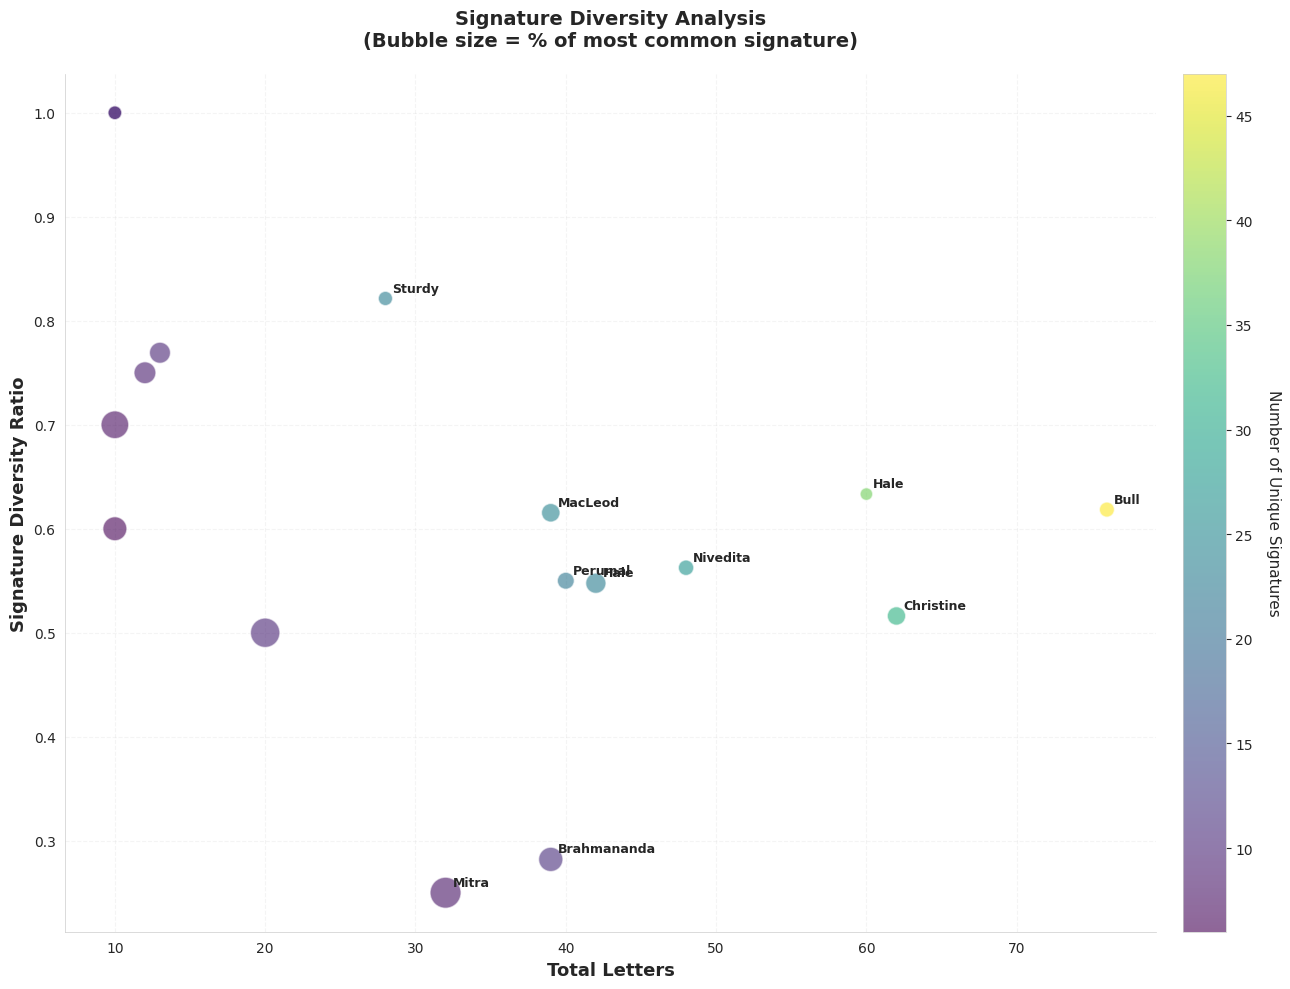

✓ Clean diversity scatter plot created

✓ All 4 clean, publication-quality plots created


In [29]:
# PLOT 4: SIGNATURE DIVERSITY SCATTER PLOT
fig, ax = plt.subplots(figsize=(14, 10))

# Calculate metrics for all recipients with >= 10 letters
recipients_metrics = []
for recipient in sig_df['Audience'].unique():
    recip_df = sig_df[sig_df['Audience'] == recipient]
    if len(recip_df) >= 10:
        total = len(recip_df)
        unique = recip_df['signature_text'].nunique()
        diversity = unique / total
        most_common_pct = (recip_df['signature_text'].value_counts().iloc[0] / total) * 100

        recipients_metrics.append({
            'recipient': recipient,
            'total_letters': total,
            'unique_sigs': unique,
            'diversity': diversity,
            'most_common_pct': most_common_pct
        })

metrics_df = pd.DataFrame(recipients_metrics)

# Create scatter plot
scatter = ax.scatter(metrics_df['total_letters'], metrics_df['diversity'],
                    s=metrics_df['most_common_pct']*10,
                    c=metrics_df['unique_sigs'],
                    cmap='viridis', alpha=0.6, edgecolors='white', linewidth=1)

# Annotate top recipients
top_recipients = sig_df['Audience'].value_counts().head(10).index
for _, row in metrics_df.iterrows():
    if row['recipient'] in top_recipients:
        ax.annotate(row['recipient'].split(',')[0],
                   xy=(row['total_letters'], row['diversity']),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, fontweight='bold')

ax.set_xlabel('Total Letters', fontsize=13, fontweight='bold')
ax.set_ylabel('Signature Diversity Ratio', fontsize=13, fontweight='bold')
ax.set_title('Signature Diversity Analysis\n(Bubble size = % of most common signature)',
            fontsize=14, fontweight='bold', pad=20)
ax.grid(alpha=0.2, linestyle='--')

# Color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label('Number of Unique Signatures', fontsize=11, rotation=270, labelpad=20)
cbar.outline.set_linewidth(0.5)

# Clean spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.savefig('signature_diversity_scatter.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Clean diversity scatter plot created")
print("\n✓ All 4 clean, publication-quality plots created")

In [30]:
print("="*80)
print("PHASE 1: POSTSCRIPT (PS) ANALYSIS")
print("="*80)

# Filter letters with postscripts
ps_df = df_clean[df_clean['ps_word_count'] > 0].copy()

print(f"\nTotal letters with PS: {len(ps_df)} out of {len(df_clean)} ({len(ps_df)/len(df_clean)*100:.1f}%)")
print(f"Total PS word count: {ps_df['ps_word_count'].sum()} words")
print(f"Average PS length: {ps_df['ps_word_count'].mean():.1f} words")
print(f"Median PS length: {ps_df['ps_word_count'].median():.0f} words")
print(f"Longest PS: {ps_df['ps_word_count'].max():.0f} words")
print(f"Shortest PS: {ps_df['ps_word_count'].min():.0f} words")

print("\n" + "="*80)
print("WHO GETS POSTSCRIPTS?")
print("="*80)

# PS by recipient
ps_by_recipient = ps_df['Audience'].value_counts()
print(f"\nRecipients who received letters with PS (Top 15):")
for recipient, count in ps_by_recipient.head(15).items():
    total_letters = len(df_clean[df_clean['Audience'] == recipient])
    pct = (count / total_letters) * 100
    print(f"  {recipient}: {count} PS out of {total_letters} letters ({pct:.1f}%)")

print("\n" + "="*80)
print("RECIPIENTS WITH HIGHEST PS RATE (min 10 letters)")
print("="*80)

# Calculate PS rate for recipients with >= 10 letters
ps_rate_data = []
for recipient in df_clean['Audience'].unique():
    recip_df = df_clean[df_clean['Audience'] == recipient]
    if len(recip_df) >= 10:
        ps_count = len(recip_df[recip_df['ps_word_count'] > 0])
        ps_rate = (ps_count / len(recip_df)) * 100
        ps_rate_data.append({
            'recipient': recipient,
            'total_letters': len(recip_df),
            'ps_count': ps_count,
            'ps_rate': ps_rate
        })

ps_rate_df = pd.DataFrame(ps_rate_data).sort_values('ps_rate', ascending=False)
print("\nTop 10 by PS rate:")
for _, row in ps_rate_df.head(10).iterrows():
    print(f"  {row['recipient']}: {row['ps_count']}/{row['total_letters']} = {row['ps_rate']:.1f}%")

print("\n" + "="*80)
print("PS DISTRIBUTION BY LANGUAGE")
print("="*80)

for lang in ['English', 'Bengali']:
    lang_df = df_clean[df_clean['Language'] == lang]
    lang_ps = lang_df[lang_df['ps_word_count'] > 0]
    ps_rate = (len(lang_ps) / len(lang_df)) * 100
    print(f"\n{lang}:")
    print(f"  Total letters: {len(lang_df)}")
    print(f"  Letters with PS: {len(lang_ps)} ({ps_rate:.1f}%)")
    print(f"  Average PS length: {lang_ps['ps_word_count'].mean():.1f} words")

print("\n" + "="*80)
print("PS DISTRIBUTION BY YEAR")
print("="*80)

ps_by_year = ps_df.groupby('Year').agg({
    'ps_word_count': ['count', 'mean']
}).round(1)
ps_by_year.columns = ['PS_count', 'Avg_PS_length']

print("\nPS frequency by year:")
for year in sorted(ps_df['Year'].dropna().unique()):
    year_total = len(df_clean[df_clean['Year'] == year])
    year_ps = len(ps_df[ps_df['Year'] == year])
    ps_rate = (year_ps / year_total) * 100 if year_total > 0 else 0
    avg_length = ps_df[ps_df['Year'] == year]['ps_word_count'].mean()
    print(f"  {year}: {year_ps}/{year_total} letters ({ps_rate:.1f}%) | Avg length: {avg_length:.1f} words")

print("\n" + "="*80)
print("LONGEST POSTSCRIPTS (Top 10)")
print("="*80)

longest_ps = ps_df.nlargest(10, 'ps_word_count')[['Audience', 'Date', 'Place', 'ps_word_count', 'ps_text']]
for idx, row in longest_ps.iterrows():
    print(f"\n{row['ps_word_count']} words to {row['Audience']} ({row['Date']}, {row['Place']})")
    print(f"Preview: {row['ps_text'][:200]}...")

print("\n" + "="*80)
print("PS CONTENT ANALYSIS - COMMON THEMES")
print("="*80)

# Extract common words/phrases from PS
ps_texts_combined = ' '.join(ps_df['ps_text'].dropna().str.lower())

# Count mentions of key topics
themes = {
    'magazine/publication': ['magazine', 'publication', 'journal', 'paper', 'article'],
    'money/funds': ['money', 'rupees', 'dollars', 'fund', 'expense', 'pay'],
    'people/names': ['sarada', 'goodwin', 'sturdy', 'mother', 'sister'],
    'instructions': ['tell', 'inform', 'write', 'send', 'remember', 'please'],
    'health': ['ill', 'sick', 'health', 'doctor', 'medicine'],
    'work/mission': ['work', 'mission', 'movement', 'vedanta', 'preach']
}

print("\nThematic content in postscripts:")
for theme, keywords in themes.items():
    count = sum(ps_texts_combined.count(keyword) for keyword in keywords)
    print(f"  {theme}: {count} mentions")

print("\n" + "="*80)
print("PS STATISTICS SUMMARY")
print("="*80)
print(f"\nTotal letters: {len(df_clean)}")
print(f"Letters with PS: {len(ps_df)} ({len(ps_df)/len(df_clean)*100:.1f}%)")
print(f"English with PS: {len(ps_df[ps_df['Language']=='English'])} ({len(ps_df[ps_df['Language']=='English'])/len(df_clean[df_clean['Language']=='English'])*100:.1f}%)")
print(f"Bengali with PS: {len(ps_df[ps_df['Language']=='Bengali'])} ({len(ps_df[ps_df['Language']=='Bengali'])/len(df_clean[df_clean['Language']=='Bengali'])*100:.1f}%)")
print(f"\nPS are used for: afterthoughts, instructions, updates, references to third parties")

PHASE 1: POSTSCRIPT (PS) ANALYSIS

Total letters with PS: 56 out of 760 (7.4%)
Total PS word count: 1970 words
Average PS length: 35.2 words
Median PS length: 22 words
Longest PS: 263 words
Shortest PS: 6 words

WHO GETS POSTSCRIPTS?

Recipients who received letters with PS (Top 15):
  Bull, Sarah: 6 PS out of 77 letters (7.8%)
  Mitra, Pramadadas: 4 PS out of 33 letters (12.1%)
  Brahmananda, Swami: 4 PS out of 40 letters (10.0%)
  Christine, Sister: 4 PS out of 66 letters (6.1%)
  Maharaja of Khetri (Singh, Ajit): 3 PS out of 13 letters (23.1%)
  Bose, Balaram: 3 PS out of 10 letters (30.0%)
  Perumal, Alasinga: 3 PS out of 40 letters (7.5%)
  Sturdy, E.T.: 3 PS out of 31 letters (9.7%)
  Brother Disciples, Swami: 2 PS out of 5 letters (40.0%)
  Hale, Mary: 2 PS out of 43 letters (4.7%)
  Gupta, Mahendra Nath: 2 PS out of 3 letters (66.7%)
  Hale, Sisters: 2 PS out of 10 letters (20.0%)
  Hale, G. W. Mrs.: 2 PS out of 60 letters (3.3%)
  Desai, Viaharidas Haridas: 2 PS out of 13 lett

In [31]:
print("="*80)
print("PHASE 1: GEOGRAPHIC ANALYSIS")
print("="*80)

# Check Place column
print(f"\nTotal letters: {len(df_clean)}")
print(f"Letters with Place info: {df_clean['Place'].notna().sum()}")
print(f"Letters missing Place: {df_clean['Place'].isna().sum()}")

print("\n" + "="*80)
print("LETTER DISTRIBUTION BY LOCATION")
print("="*80)

# Analyze Place column
place_counts = df_clean['Place'].value_counts()
print(f"\nTotal unique locations: {len(place_counts)}")
print(f"\nTop 20 locations by letter count:")
for place, count in place_counts.head(20).items():
    print(f"  {place}: {count} letters")

print("\n" + "="*80)
print("GEOGRAPHIC REGIONS (extracted from Place)")
print("="*80)

# Extract country/region from Place
def extract_country(place):
    if pd.isna(place):
        return 'Unknown'
    place_str = str(place)
    if 'USA' in place_str or 'America' in place_str:
        return 'USA'
    elif 'England' in place_str or 'London' in place_str:
        return 'England'
    elif 'India' in place_str:
        return 'India'
    elif 'Switzerland' in place_str:
        return 'Switzerland'
    elif 'France' in place_str or 'Paris' in place_str:
        return 'France'
    elif 'Italy' in place_str:
        return 'Italy'
    elif 'Germany' in place_str:
        return 'Germany'
    else:
        return 'Other/Unknown'

df_clean['Country'] = df_clean['Place'].apply(extract_country)

country_counts = df_clean['Country'].value_counts()
print("\nLetters by country/region:")
for country, count in country_counts.items():
    pct = (count / len(df_clean)) * 100
    print(f"  {country}: {count} letters ({pct:.1f}%)")

print("\n" + "="*80)
print("WRITING PATTERNS BY LOCATION")
print("="*80)

# Analyze writing patterns by location
for country in ['USA', 'England', 'India', 'Switzerland']:
    country_df = df_clean[df_clean['Country'] == country]
    if len(country_df) > 0:
        print(f"\n{country.upper()} ({len(country_df)} letters):")
        print(f"  Average body length: {country_df['body_word_count'].mean():.1f} words")
        print(f"  Average signature length: {country_df['signature_word_count'].mean():.1f} words")
        print(f"  Letters with PS: {(country_df['ps_word_count'] > 0).sum()} ({(country_df['ps_word_count'] > 0).sum()/len(country_df)*100:.1f}%)")

        # Top recipients from this location
        top_recip = country_df['Audience'].value_counts().head(3)
        print(f"  Top recipients:")
        for recip, count in top_recip.items():
            print(f"    - {recip}: {count} letters")

        # Language distribution
        lang_dist = country_df['Language'].value_counts()
        print(f"  Languages: {lang_dist.to_dict()}")

print("\n" + "="*80)
print("YEAR-WISE GEOGRAPHIC DISTRIBUTION")
print("="*80)

# Geographic movement over time
year_country = df_clean.groupby(['Year', 'Country']).size().unstack(fill_value=0)
print("\nLetters by year and location:")
print(year_country)

print("\n" + "="*80)
print("LONGEST/SHORTEST LETTERS BY LOCATION")
print("="*80)

for country in ['USA', 'England', 'India']:
    country_df = df_clean[df_clean['Country'] == country]
    if len(country_df) > 0:
        longest = country_df.nlargest(1, 'body_word_count').iloc[0]
        shortest = country_df.nsmallest(1, 'body_word_count').iloc[0]

        print(f"\n{country}:")
        print(f"  Longest: {longest['body_word_count']} words to {longest['Audience']} ({longest['Date']})")
        print(f"  Shortest: {shortest['body_word_count']} words to {shortest['Audience']} ({shortest['Date']})")

PHASE 1: GEOGRAPHIC ANALYSIS

Total letters: 760
Letters with Place info: 755
Letters missing Place: 5

LETTER DISTRIBUTION BY LOCATION

Total unique locations: 110

Top 20 locations by letter count:
  USA, NY, New York City: 111 letters
  India, Belur: 82 letters
  USA: 52 letters
  England, London: 38 letters
  India, Almora: 35 letters
  USA, IL, Chicago: 34 letters
  USA, CA, San Francisco: 31 letters
  India, Ghazipur: 25 letters
  France, Paris: 19 letters
  England, Reading, Caversham: 19 letters
  USA, MA, Boston: 16 letters
  India, Darjeeling: 16 letters
  USA, NY, Stone Ridge, Ridgely Manor: 16 letters
  USA, CA, Los Angeles: 13 letters
  India, Srinagar: 13 letters
  USA, MI, Detroit: 12 letters
  USA, NY, Thousand Island Park: 11 letters
  India, Varanasi: 10 letters
  England, Wimbledon: 9 letters
  India, Baranagore: 8 letters

GEOGRAPHIC REGIONS (extracted from Place)

Letters by country/region:
  USA: 355 letters (46.7%)
  India: 273 letters (35.9%)
  England: 73 lette

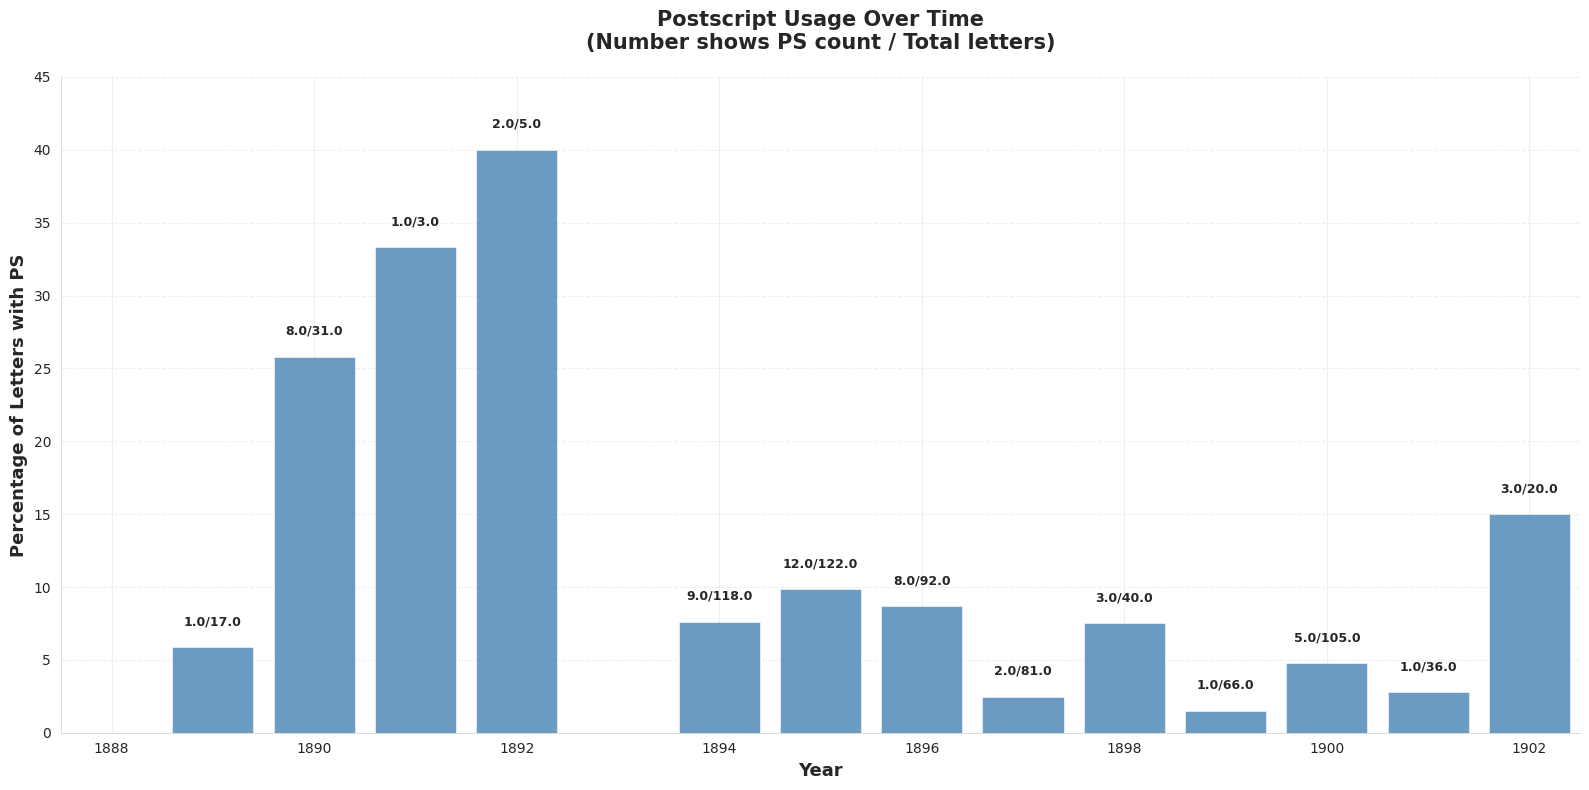

✓ PS rate by year plot saved


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set clean style
sns.set_style("whitegrid")
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.3

# ============================================================
# PLOT 1: PS RATE BY YEAR
# ============================================================
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate PS rate by year
years = sorted(df_clean['Year'].dropna().unique())
ps_data = []

for year in years:
    year_df = df_clean[df_clean['Year'] == year]
    ps_count = (year_df['ps_word_count'] > 0).sum()
    total = len(year_df)
    ps_rate = (ps_count / total) * 100
    avg_ps_length = year_df[year_df['ps_word_count'] > 0]['ps_word_count'].mean()

    ps_data.append({
        'year': int(year),
        'ps_rate': ps_rate,
        'ps_count': ps_count,
        'total_letters': total,
        'avg_ps_length': avg_ps_length if pd.notna(avg_ps_length) else 0
    })

ps_year_df = pd.DataFrame(ps_data)

# Create bar chart for PS rate
bars = ax.bar(ps_year_df['year'], ps_year_df['ps_rate'],
              color='steelblue', edgecolor='white', linewidth=0.5, alpha=0.8)

# Add count labels
for idx, row in ps_year_df.iterrows():
    if row['ps_count'] > 0:
        ax.text(row['year'], row['ps_rate'] + 1.5,
               f"{row['ps_count']}/{row['total_letters']}",
               ha='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Percentage of Letters with PS', fontsize=13, fontweight='bold')
ax.set_title('Postscript Usage Over Time\n(Number shows PS count / Total letters)',
            fontsize=15, fontweight='bold', pad=20)
ax.set_xlim(1887.5, 1902.5)
ax.set_ylim(0, 45)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.savefig('ps_rate_by_year.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ PS rate by year plot saved")

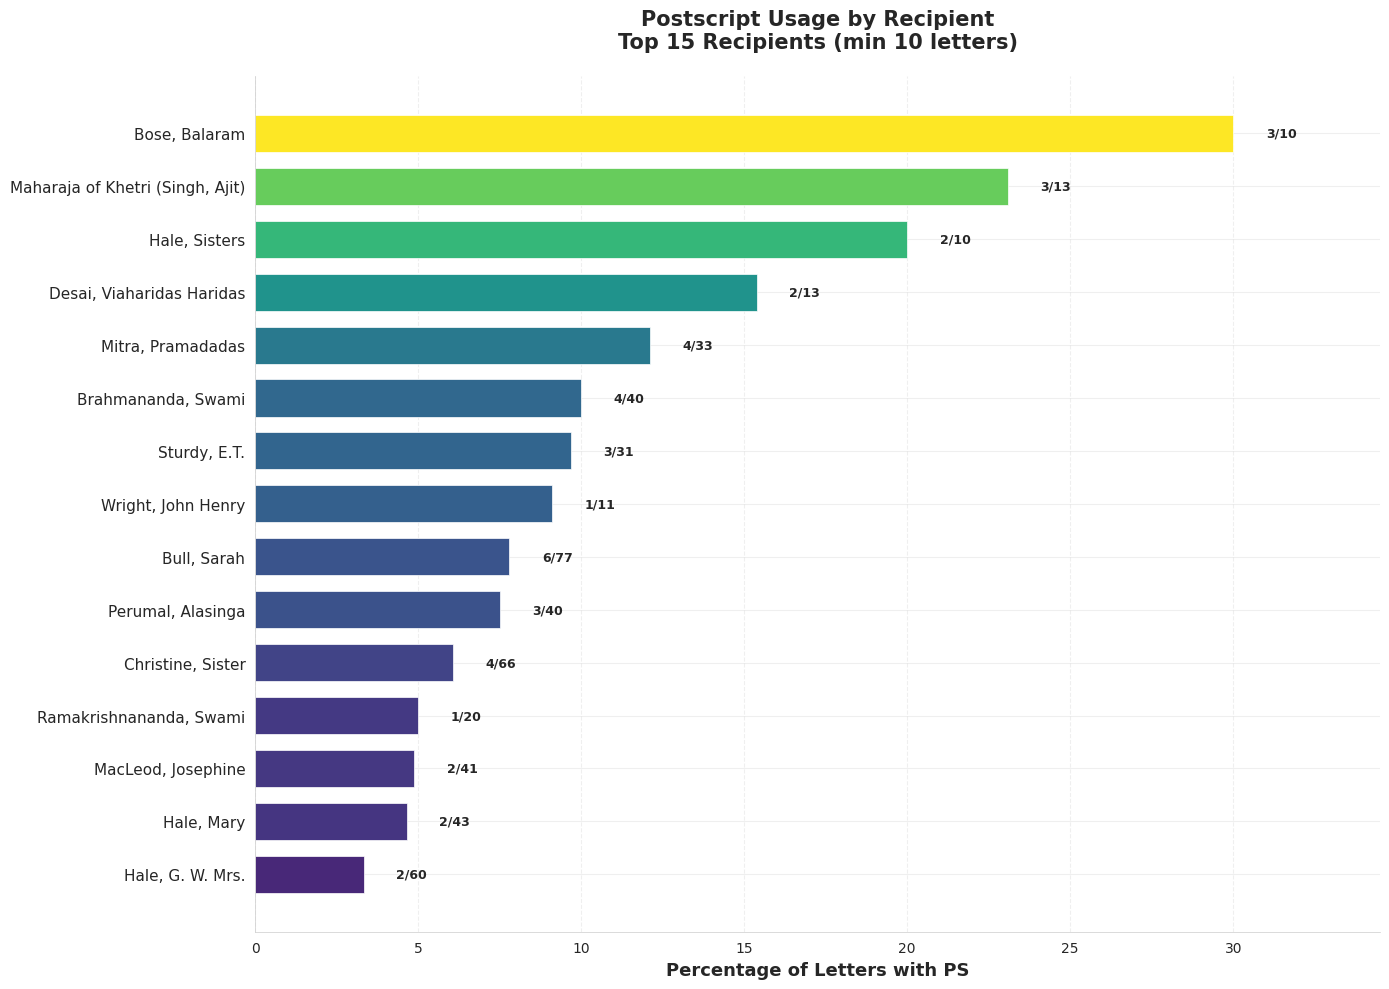

✓ PS rate by recipient plot saved


In [33]:
# ============================================================
# PLOT 2: PS RATE BY RECIPIENT (Top 15)
# ============================================================
fig, ax = plt.subplots(figsize=(14, 10))

# Get recipients with >= 10 letters
ps_recipient_data = []
for recipient in df_clean['Audience'].unique():
    recip_df = df_clean[df_clean['Audience'] == recipient]
    if len(recip_df) >= 10:
        ps_count = (recip_df['ps_word_count'] > 0).sum()
        ps_rate = (ps_count / len(recip_df)) * 100

        ps_recipient_data.append({
            'recipient': recipient,
            'ps_count': ps_count,
            'total_letters': len(recip_df),
            'ps_rate': ps_rate
        })

ps_recip_df = pd.DataFrame(ps_recipient_data).sort_values('ps_rate', ascending=True).tail(15)

# Create horizontal bar chart
colors = plt.cm.viridis(ps_recip_df['ps_rate'] / ps_recip_df['ps_rate'].max())
bars = ax.barh(range(len(ps_recip_df)), ps_recip_df['ps_rate'],
              color=colors, edgecolor='white', linewidth=0.5, height=0.7)

# Add count labels
for idx, row in enumerate(ps_recip_df.itertuples()):
    ax.text(row.ps_rate + 1, idx,
           f"{row.ps_count}/{row.total_letters}",
           va='center', fontsize=9, fontweight='bold')

ax.set_yticks(range(len(ps_recip_df)))
ax.set_yticklabels(ps_recip_df['recipient'], fontsize=11)
ax.set_xlabel('Percentage of Letters with PS', fontsize=13, fontweight='bold')
ax.set_title('Postscript Usage by Recipient\nTop 15 Recipients (min 10 letters)',
            fontsize=15, fontweight='bold', pad=20)
ax.set_xlim(0, max(ps_recip_df['ps_rate']) * 1.15)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()
plt.savefig('ps_rate_by_recipient.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ PS rate by recipient plot saved")

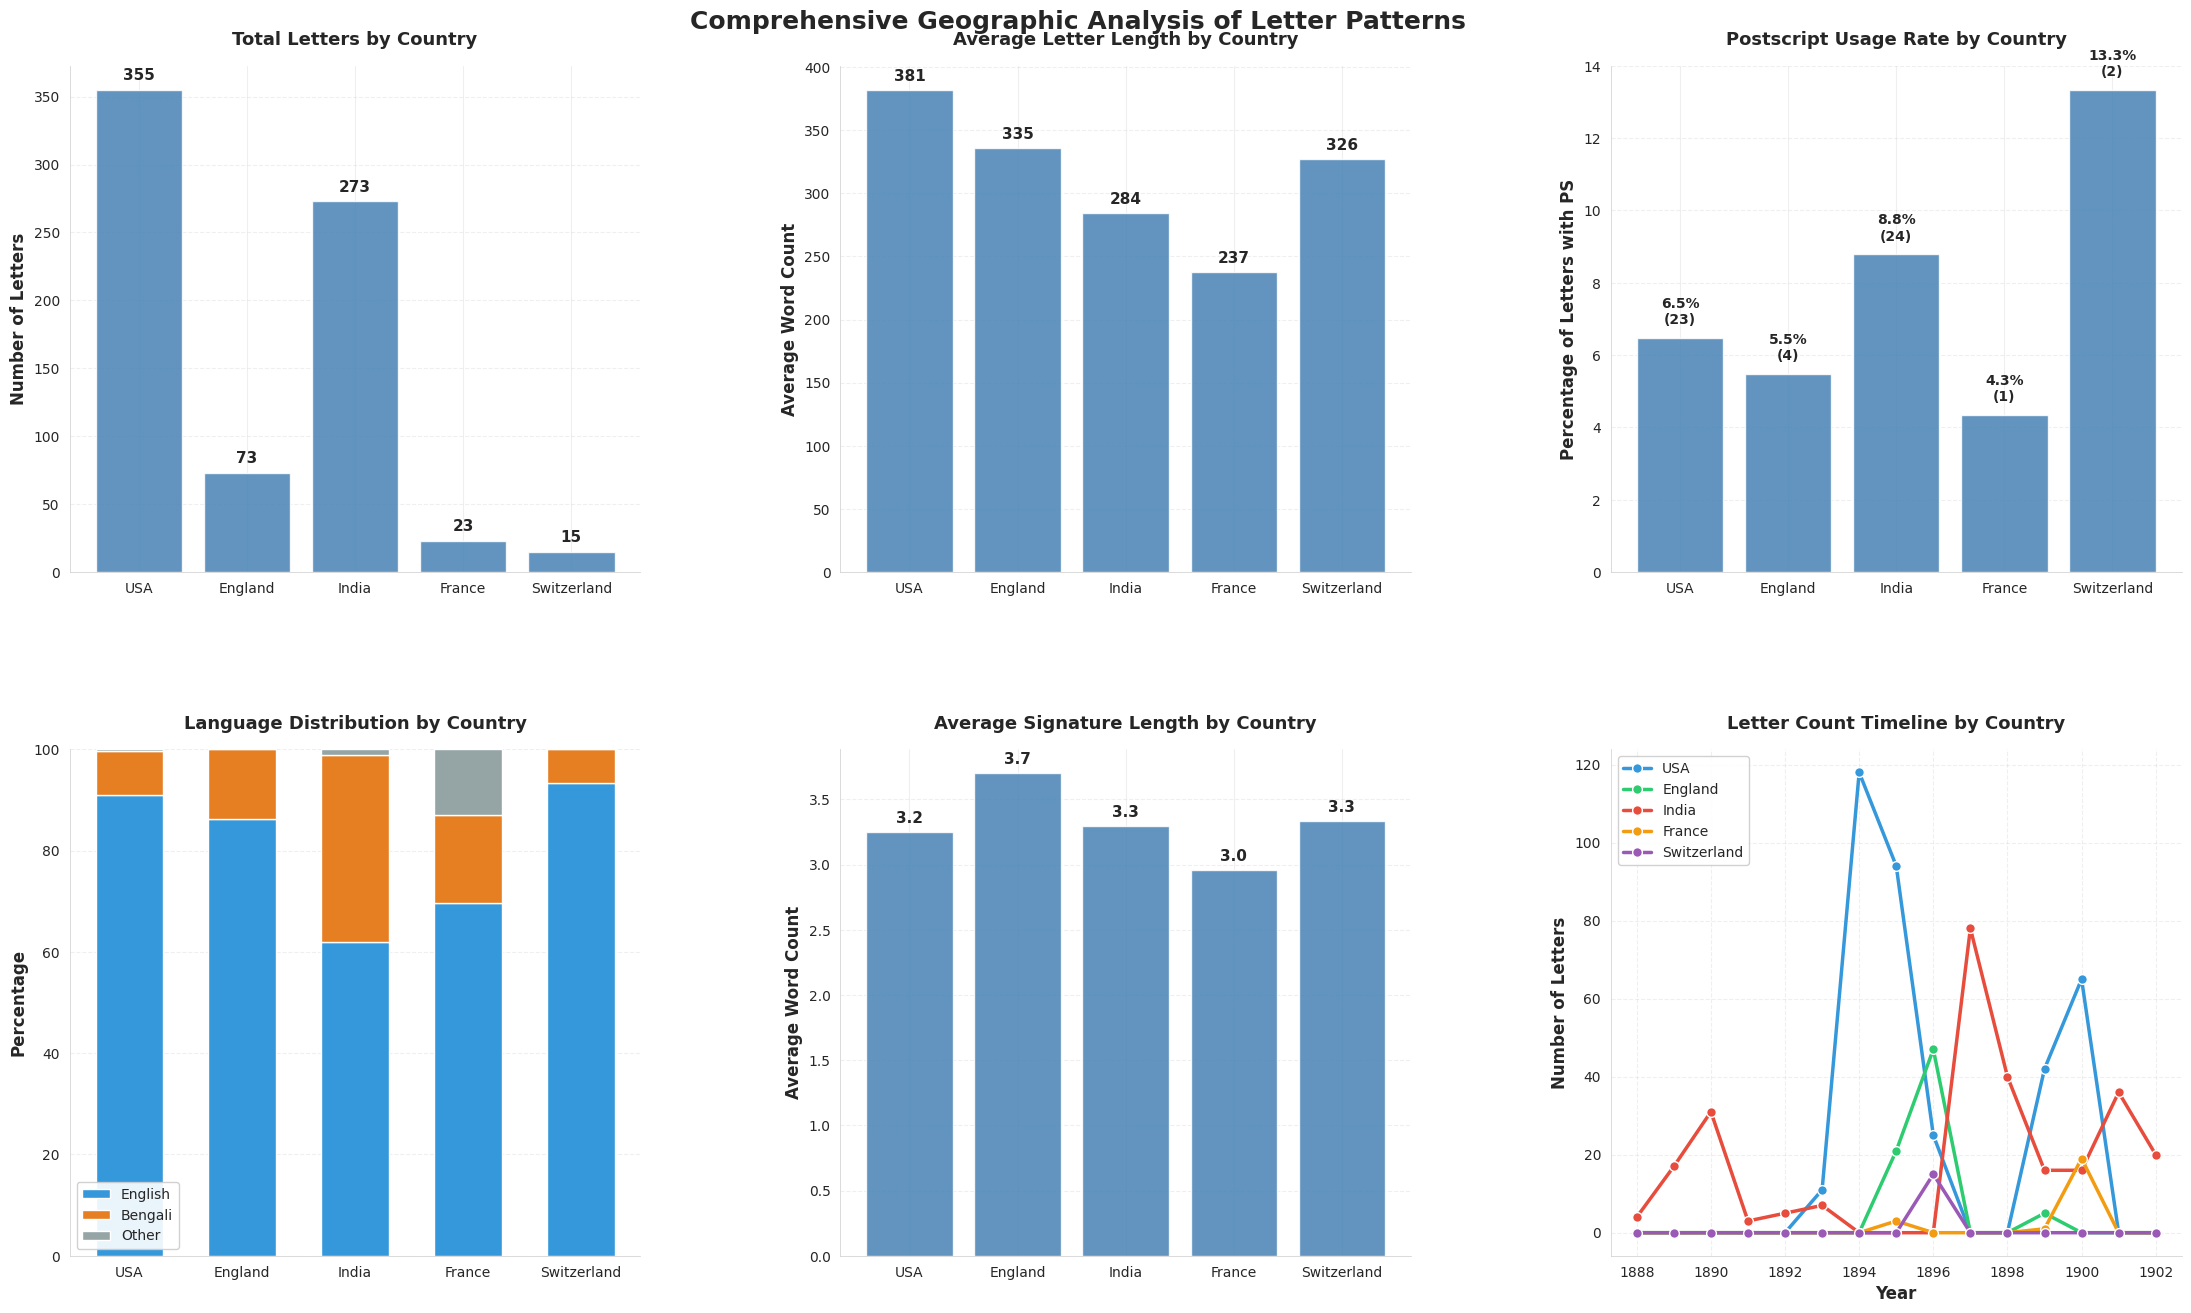

✓ Comprehensive geographic analysis created
  - Bar charts use single color (no meaningless variation)
  - Colors only used when they encode information (languages, timeline)


In [40]:
# ============================================================
# COMPREHENSIVE GEOGRAPHIC ANALYSIS - 6 SUBPLOTS (CORRECT)
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
plt.subplots_adjust(left=0.08, right=0.96, top=0.93, bottom=0.08, hspace=0.35, wspace=0.35)

fig.suptitle('Comprehensive Geographic Analysis of Letter Patterns',
             fontsize=18, fontweight='bold', y=0.97)

# Prepare country-level aggregated data
major_countries = ['USA', 'England', 'India', 'France', 'Switzerland']
country_stats = []

for country in major_countries:
    country_df = df_clean[df_clean['Country'] == country]
    if len(country_df) > 0:
        country_stats.append({
            'country': country,
            'total_letters': len(country_df),
            'avg_body_length': country_df['body_word_count'].mean(),
            'avg_sig_length': country_df['signature_word_count'].mean(),
            'ps_rate': (country_df['ps_word_count'] > 0).sum() / len(country_df) * 100,
            'ps_count': (country_df['ps_word_count'] > 0).sum(),
            'avg_ps_length': country_df[country_df['ps_word_count'] > 0]['ps_word_count'].mean(),
            'english_pct': (country_df['Language'] == 'English').sum() / len(country_df) * 100,
            'bengali_pct': (country_df['Language'] == 'Bengali').sum() / len(country_df) * 100
        })

country_stats_df = pd.DataFrame(country_stats)

# Single color for all bars (except where color has meaning)
bar_color = 'steelblue'

# ============================================================
# SUBPLOT 1: Total Letters by Country
# ============================================================
ax1 = axes[0, 0]
bars = ax1.bar(country_stats_df['country'], country_stats_df['total_letters'],
               color=bar_color, edgecolor='white', linewidth=1, alpha=0.85)

for bar, val in zip(bars, country_stats_df['total_letters']):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 5, str(int(val)),
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
ax1.set_title('Total Letters by Country', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ============================================================
# SUBPLOT 2: Average Letter Length by Country
# ============================================================
ax2 = axes[0, 1]
bars = ax2.bar(country_stats_df['country'], country_stats_df['avg_body_length'],
               color=bar_color, edgecolor='white', linewidth=1, alpha=0.85)

for bar, val in zip(bars, country_stats_df['avg_body_length']):
    ax2.text(bar.get_x() + bar.get_width()/2, val + 5, f'{int(val)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylabel('Average Word Count', fontsize=12, fontweight='bold')
ax2.set_title('Average Letter Length by Country', fontsize=13, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# ============================================================
# SUBPLOT 3: PS Rate by Country
# ============================================================
ax3 = axes[0, 2]
bars = ax3.bar(country_stats_df['country'], country_stats_df['ps_rate'],
               color=bar_color, edgecolor='white', linewidth=1, alpha=0.85)

for idx, (bar, row) in enumerate(zip(bars, country_stats_df.itertuples())):
    ax3.text(bar.get_x() + bar.get_width()/2, row.ps_rate + 0.3,
            f'{row.ps_rate:.1f}%\n({row.ps_count})',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax3.set_ylabel('Percentage of Letters with PS', fontsize=12, fontweight='bold')
ax3.set_title('Postscript Usage Rate by Country', fontsize=13, fontweight='bold', pad=15)
ax3.grid(axis='y', alpha=0.3, linestyle='--')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# ============================================================
# SUBPLOT 4: Language Distribution by Country (Stacked Bar)
# ============================================================
ax4 = axes[1, 0]
width = 0.6
x_pos = np.arange(len(country_stats_df))

english = country_stats_df['english_pct'].values
bengali = country_stats_df['bengali_pct'].values
other = 100 - english - bengali

# Here colors DO have meaning (different languages)
bars1 = ax4.bar(x_pos, english, width, label='English', color='#3498db', edgecolor='white', linewidth=1)
bars2 = ax4.bar(x_pos, bengali, width, bottom=english, label='Bengali', color='#e67e22', edgecolor='white', linewidth=1)
bars3 = ax4.bar(x_pos, other, width, bottom=english+bengali, label='Other', color='#95a5a6', edgecolor='white', linewidth=1)

ax4.set_xticks(x_pos)
ax4.set_xticklabels(country_stats_df['country'])
ax4.set_ylabel('Percentage', fontsize=12, fontweight='bold')
ax4.set_title('Language Distribution by Country', fontsize=13, fontweight='bold', pad=15)
ax4.legend(fontsize=10, framealpha=0.9)
ax4.grid(axis='y', alpha=0.3, linestyle='--')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# ============================================================
# SUBPLOT 5: Signature Length by Country
# ============================================================
ax5 = axes[1, 1]
bars = ax5.bar(country_stats_df['country'], country_stats_df['avg_sig_length'],
               color=bar_color, edgecolor='white', linewidth=1, alpha=0.85)

for bar, val in zip(bars, country_stats_df['avg_sig_length']):
    ax5.text(bar.get_x() + bar.get_width()/2, val + 0.05, f'{val:.1f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax5.set_ylabel('Average Word Count', fontsize=12, fontweight='bold')
ax5.set_title('Average Signature Length by Country', fontsize=13, fontweight='bold', pad=15)
ax5.grid(axis='y', alpha=0.3, linestyle='--')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

# ============================================================
# SUBPLOT 6: Letter Count Over Time by Country
# ============================================================
ax6 = axes[1, 2]

year_country = df_clean.groupby(['Year', 'Country']).size().unstack(fill_value=0)
years = year_country.index.astype(int)

# Here colors DO have meaning (different countries over time)
country_colors_timeline = {
    'USA': '#3498db',
    'England': '#2ecc71',
    'India': '#e74c3c',
    'France': '#f39c12',
    'Switzerland': '#9b59b6'
}

for country in major_countries:
    if country in year_country.columns:
        values = year_country[country].values
        ax6.plot(years, values, marker='o', linewidth=2.5, markersize=7,
                label=country, color=country_colors_timeline[country],
                markeredgecolor='white', markeredgewidth=1)

ax6.set_xlabel('Year', fontsize=12, fontweight='bold')
ax6.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
ax6.set_title('Letter Count Timeline by Country', fontsize=13, fontweight='bold', pad=15)
ax6.legend(fontsize=10, framealpha=0.9, loc='upper left')
ax6.grid(alpha=0.3, linestyle='--')
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

plt.savefig('geographic_comprehensive_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Comprehensive geographic analysis created")
print("  - Bar charts use single color (no meaningless variation)")
print("  - Colors only used when they encode information (languages, timeline)")

In [43]:
print("="*80)
print("CORRESPONDENCE RATE & FREQUENCY PATTERNS")
print("="*80)

# Parse dates if not already done
if 'Date_parsed' not in df_clean.columns:
    df_clean['Date_parsed'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_sorted = df_clean.sort_values('Date_parsed')

# Analyze top 10 recipients
top_recipients = df_clean['Audience'].value_counts().head(10)
print(f"\nAnalyzing top 10 recipients by letter volume:\n")

for recipient in top_recipients.index:
    print(f"\n{'='*60}")
    print(f"RECIPIENT: {recipient}")
    print('='*60)

    # Get all letters to this recipient with dates
    recipient_letters = df_sorted[df_sorted['Audience'] == recipient]['Date_parsed'].dropna()

    if len(recipient_letters) < 2:
        print(f"Only {len(recipient_letters)} letter(s) with date - cannot analyze patterns")
        continue

    # Calculate gaps between consecutive letters
    gaps = recipient_letters.diff().dt.days.dropna()

    # Basic statistics
    print(f"Total letters: {len(recipient_letters)}")
    print(f"Date range: {recipient_letters.min().strftime('%Y-%m-%d')} to {recipient_letters.max().strftime('%Y-%m-%d')}")
    print(f"Total span: {(recipient_letters.max() - recipient_letters.min()).days} days")

    print(f"\nGap statistics (days between consecutive letters):")
    print(f"  Mean gap: {gaps.mean():.1f} days")
    print(f"  Median gap: {gaps.median():.1f} days")
    print(f"  Shortest gap: {gaps.min():.0f} days")
    print(f"  Longest gap: {gaps.max():.0f} days")
    print(f"  Std deviation: {gaps.std():.1f} days")

    # Frequency categories
    rapid_fire = (gaps <= 7).sum()
    regular = ((gaps > 7) & (gaps <= 30)).sum()
    sparse = ((gaps > 30) & (gaps <= 90)).sum()
    very_sparse = (gaps > 90).sum()

    print(f"\nCorrespondence patterns:")
    print(f"  Rapid-fire (≤7 days): {rapid_fire} instances ({rapid_fire/len(gaps)*100:.1f}%)")
    print(f"  Regular (8-30 days): {regular} instances ({regular/len(gaps)*100:.1f}%)")
    print(f"  Sparse (31-90 days): {sparse} instances ({sparse/len(gaps)*100:.1f}%)")
    print(f"  Very sparse (>90 days): {very_sparse} instances ({very_sparse/len(gaps)*100:.1f}%)")

    # Find clustering periods (3+ letters within 30 days)
    clusters = []
    for i in range(len(recipient_letters) - 2):
        window_start = recipient_letters.iloc[i]
        window_end = window_start + timedelta(days=30)
        letters_in_window = recipient_letters[(recipient_letters >= window_start) &
                                              (recipient_letters <= window_end)]
        if len(letters_in_window) >= 3:
            clusters.append((window_start, len(letters_in_window)))

    if clusters:
        # Remove overlapping clusters, keep most intense
        unique_clusters = []
        for start, count in clusters:
            if not any(abs((start - prev_start).days) < 15 for prev_start, _ in unique_clusters):
                unique_clusters.append((start, count))

        print(f"\nIntense correspondence clusters (3+ letters in 30 days):")
        for start, count in sorted(unique_clusters, key=lambda x: x[1], reverse=True)[:5]:
            print(f"  {start.strftime('%Y-%m')}: {count} letters in 30 days")

    # Find longest silence periods
    if len(gaps) > 0:
        longest_silences = gaps.nlargest(3)
        print(f"\nLongest silence periods:")
        for gap_days in longest_silences:
            for i, gap_val in enumerate(gaps):
                if gap_val == gap_days:
                    prev_date = recipient_letters.iloc[i]
                    next_date = recipient_letters.iloc[i+1]
                    print(f"  {gap_days:.0f} days: {prev_date.strftime('%Y-%m-%d')} to {next_date.strftime('%Y-%m-%d')}")
                    break

print("\n" + "="*80)
print("END OF CORRESPONDENCE RATE ANALYSIS")
print("="*80)

CORRESPONDENCE RATE & FREQUENCY PATTERNS

Analyzing top 10 recipients by letter volume:


RECIPIENT: Bull, Sarah
Total letters: 73
Date range: 1894-09-19 to 1902-06-14
Total span: 2824 days

Gap statistics (days between consecutive letters):
  Mean gap: 39.2 days
  Median gap: 21.0 days
  Shortest gap: 0 days
  Longest gap: 318 days
  Std deviation: 60.7 days

Correspondence patterns:
  Rapid-fire (≤7 days): 21 instances (29.2%)
  Regular (8-30 days): 26 instances (36.1%)
  Sparse (31-90 days): 19 instances (26.4%)
  Very sparse (>90 days): 6 instances (8.3%)

Intense correspondence clusters (3+ letters in 30 days):
  1899-11: 5 letters in 30 days
  1895-12: 4 letters in 30 days
  1896-07: 4 letters in 30 days
  1900-02: 4 letters in 30 days
  1894-09: 3 letters in 30 days

Longest silence periods:
  318 days: 1901-03-29 to 1902-02-10
  269 days: 1898-04-04 to 1898-12-29
  228 days: 1897-08-19 to 1898-04-04

RECIPIENT: Christine, Sister
Total letters: 65
Date range: 1895-08-09 to 1902-